
## RNN for data with time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


Unnamed: 0  SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0           0  1.152  2021-08-01 00:00:00                8.084517   
1           1  1.152  2021-08-01 00:01:00                8.079545   
2           2  1.152  2021-08-01 00:02:00                8.074573   
3           3  1.152  2021-08-01 00:03:00                8.069602   
4           4  1.152  2021-08-01 00:04:00                8.064630   

   NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0    158.478922    245.634175    145.396538    220.717349   
1    159.637733    252.459217    145.570895    226.360600   
2    160.796544    252.645736    145.745252    230.297540   
3    161.955355    247.987563    145.919609    225.220292   
4    163.102736    226.923719    146.093966    218.827693   

   Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0            22.322068             18.729296  ...            54.250139   
1            22.335329             18.731320  ...            54.194257   
2            22.348590             18.733343  ...            54.138374   
3            22.361852             18.735367  ...            54.082797   
4            22.375113             18.737391  ...            54.063779   

   HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0          1999.604384   179.749638               2.510680           0.0   
1          2000.288837   179.765945               2.489381           0.0   
2          1999.242862   179.782251               2.489037           0.0   
3          1999.884442   179.798490               2.496867           0.0   
4          1999.849729   179.784430               2.501961           0.0   

   NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0            4034.234339           992           1.048           0.546   
1            4024.947376           992           1.048           0.546   
2            4011.601682           992           1.048           0.546   
3            4012.024633           992           1.048           0.546   
4            4000.467204           992           1.048           0.546   

   Slag_Fe_f2  
0        0.05  
1        0.05  
2        0.05  
3        0.05  
4        0.05  

[5 rows x 21 columns]

In [7]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0                0  1.152000  2021-08-01 00:00:00                8.084517   
1                1  1.152000  2021-08-01 00:01:00                8.079545   
2                2  1.152000  2021-08-01 00:02:00                8.074573   
3                3  1.152000  2021-08-01 00:03:00                8.069602   
4                4  1.152000  2021-08-01 00:04:00                8.064630   
...            ...       ...                  ...                     ...   
265731      265731  0.662065  2022-01-31 16:12:00                5.155158   
265732      265732  0.662446  2022-01-31 16:13:00                5.161362   
265733      265733  0.662826  2022-01-31 16:14:00                5.167567   
265734      265734  0.663207  2022-01-31 16:15:00                5.173771   
265735      265735  0.663587  2022-01-31 16:16:00                5.179976   

        NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0         158.478922    245.634175    145.396538    220.717349   
1         159.637733    252.459217    145.570895    226.360600   
2         160.796544    252.645736    145.745252    230.297540   
3         161.955355    247.987563    145.919609    225.220292   
4         163.102736    226.923719    146.093966    218.827693   
...              ...           ...           ...           ...   
265731    168.935281    202.117809    163.555824    219.714757   
265732    170.715532    202.106673    164.493156    220.911245   
265733    172.495783    205.875063    165.430489    222.902059   
265734    174.440392    212.764586    166.688229    232.269437   
265735    178.348950    219.654109    170.012230    243.436510   

        Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0                 22.322068             18.729296  ...            54.250139   
1                 22.335329             18.731320  ...            54.194257   
2                 22.348590             18.733343  ...            54.138374   
3                 22.361852             18.735367  ...            54.082797   
4                 22.375113             18.737391  ...            54.063779   
...                     ...                   ...  ...                  ...   
265731            20.510372             17.817248  ...            55.682915   
265732            20.510606             17.815391  ...            55.688159   
265733            20.510840             17.813534  ...            55.693057   
265734            20.511074             17.811677  ...            55.697567   
265735            20.511309             17.809820  ...            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992         

In [8]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [9]:
l_new = ['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [10]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [11]:

for_RNN_data_CIVS 


SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000  2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000  2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000  2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000  2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000  2021-08-01 00:04:00                8.064630    163.102736   
...          ...                  ...                     ...           ...   
265731  0.662065  2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446  2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826  2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207  2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587  2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3      

In [12]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   265736 non-null  float64
 1   MM_Timestamp_f1         265736 non-null  object 
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64
 3   NE_Uptake_f3            265736 non-null  float64
 4   SE_Uptake_f3            265736 non-null  float64
 5   NW_Uptake_f3            265736 non-null  float64
 6   SW_Uptake_f3            265736 non-null  float64
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64
 12  WINDRATE_f3             265736 non-null  float64
 13  HIGH_PURITY_OXYGEN_f3   265736 non-null  float64
 14  COAL_FLOW_f3        


## Plots


In [13]:

for_RNN_data_CIVS['MM_Timestamp_f1'] = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")

rc22 = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")


In [14]:

rc22


0        2021-08-01 00:00:00
1        2021-08-01 00:01:00
2        2021-08-01 00:02:00
3        2021-08-01 00:03:00
4        2021-08-01 00:04:00
                 ...        
265731   2022-01-31 16:12:00
265732   2022-01-31 16:13:00
265733   2022-01-31 16:14:00
265734   2022-01-31 16:15:00
265735   2022-01-31 16:16:00
Name: MM_Timestamp_f1, Length: 265736, dtype: datetime64[ns]

In [15]:

plt.rcParams["figure.figsize"] = [15, 5]


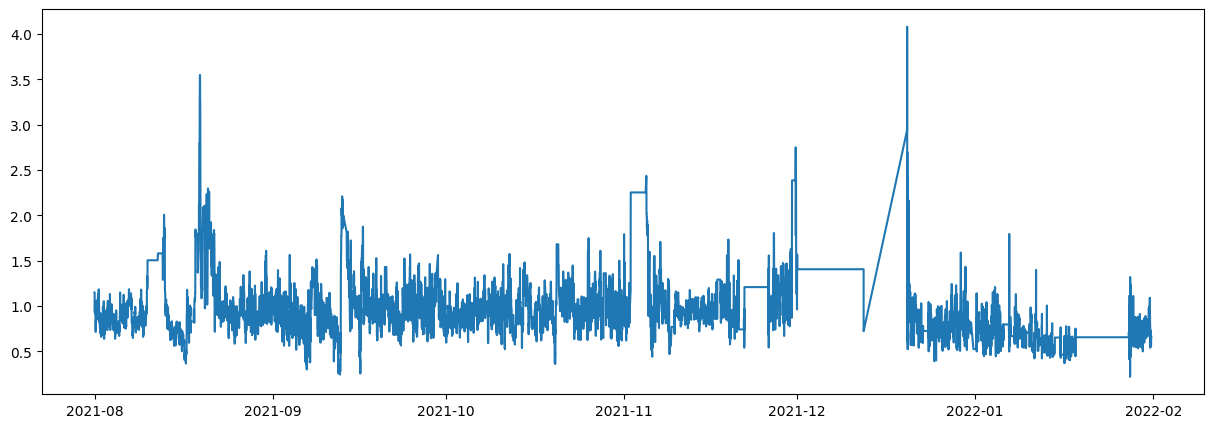

In [16]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

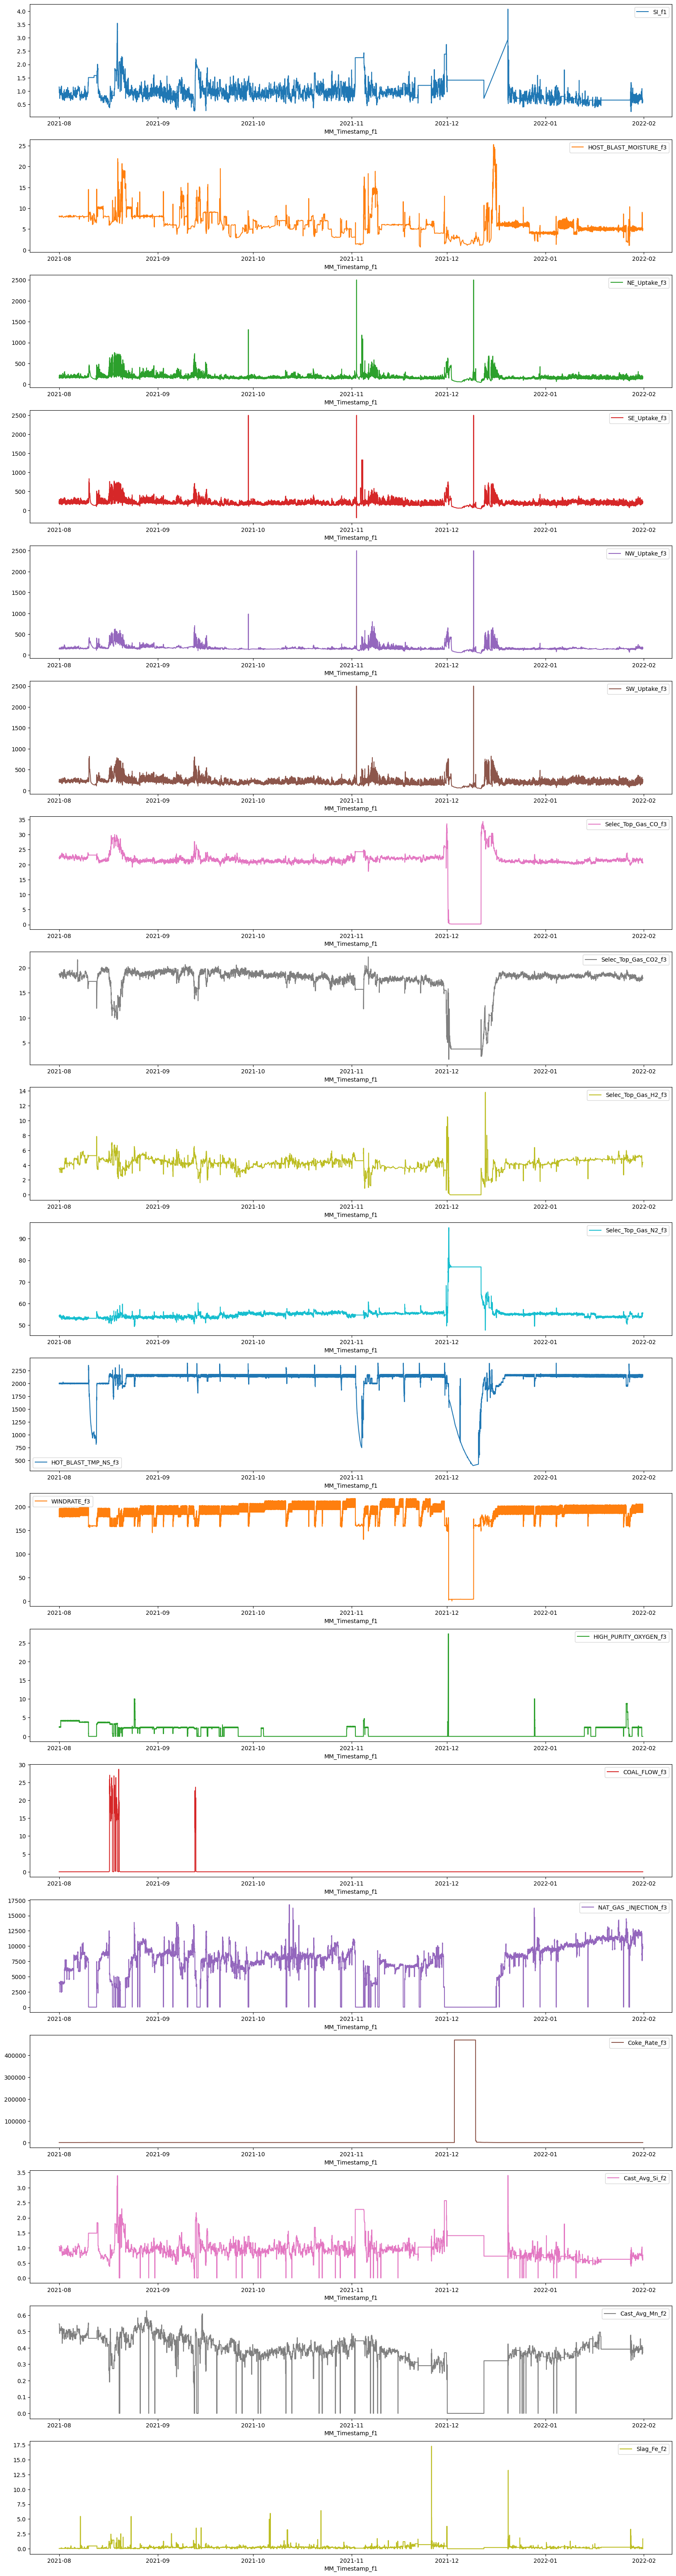

In [17]:

## layout=(4, 3), 
## style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
## xticks=np.arange(0, len(df), 16)

## for_RNN_data_CIVS.plot( xticks=rc22, figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [18]:

l_new


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

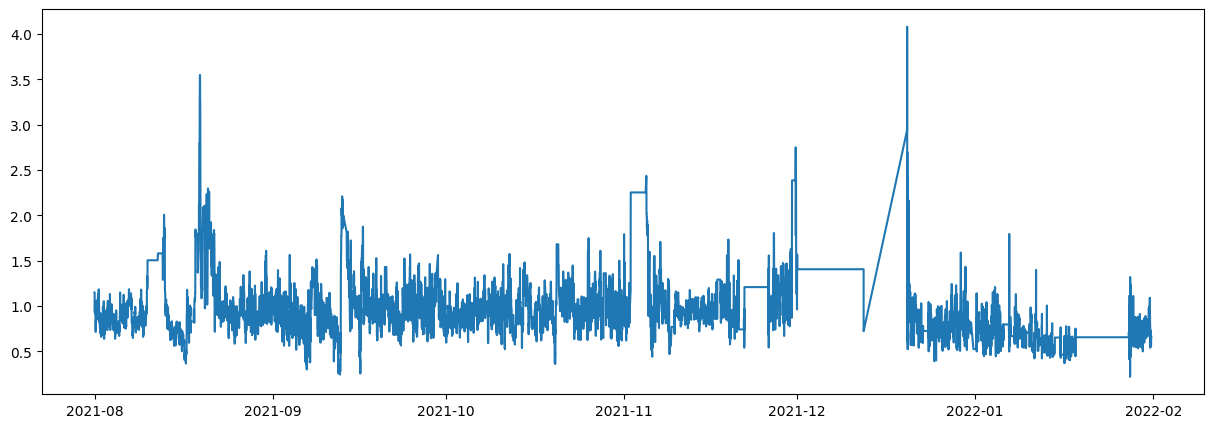

In [19]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


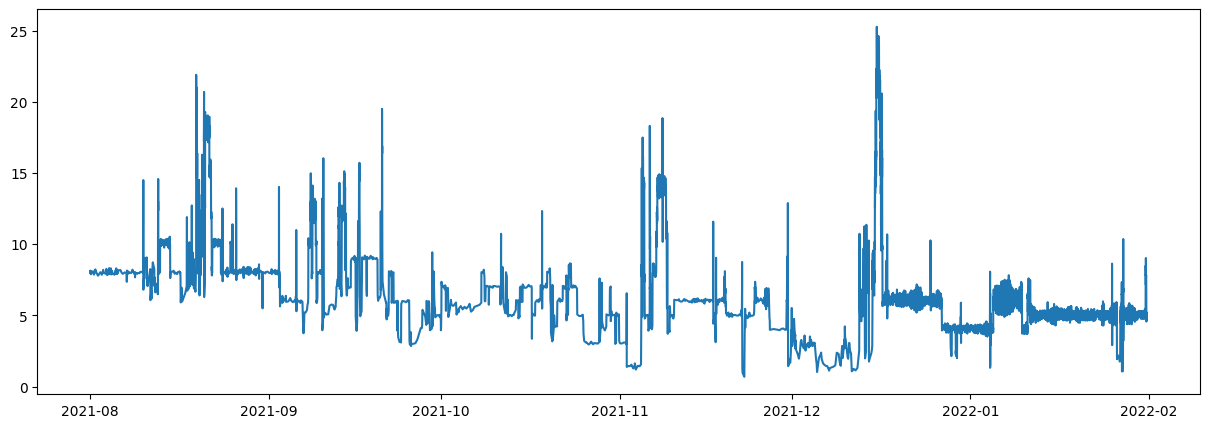

In [20]:

plt.plot(rc22, for_RNN_data_CIVS['HOST_BLAST_MOISTURE_f3'])


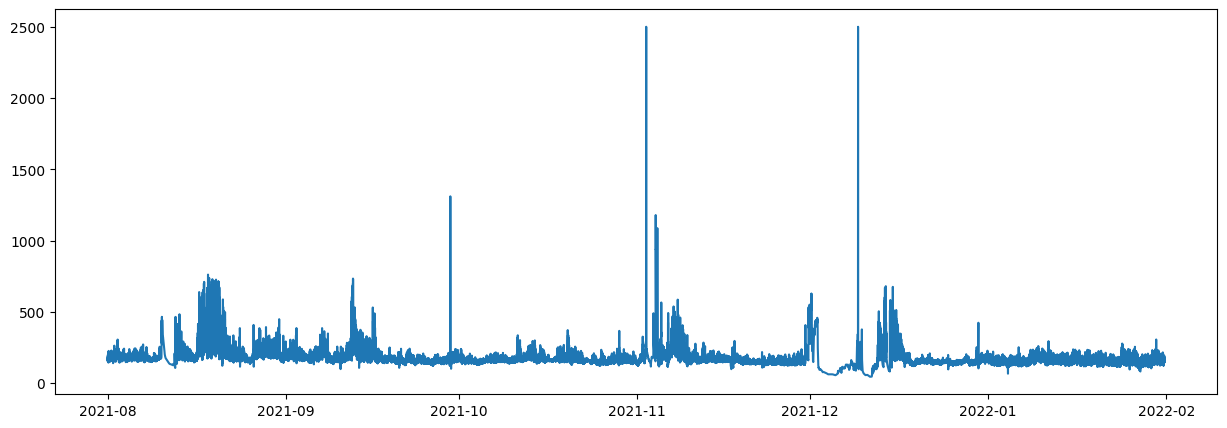

In [21]:

plt.plot(rc22, for_RNN_data_CIVS['NE_Uptake_f3'])


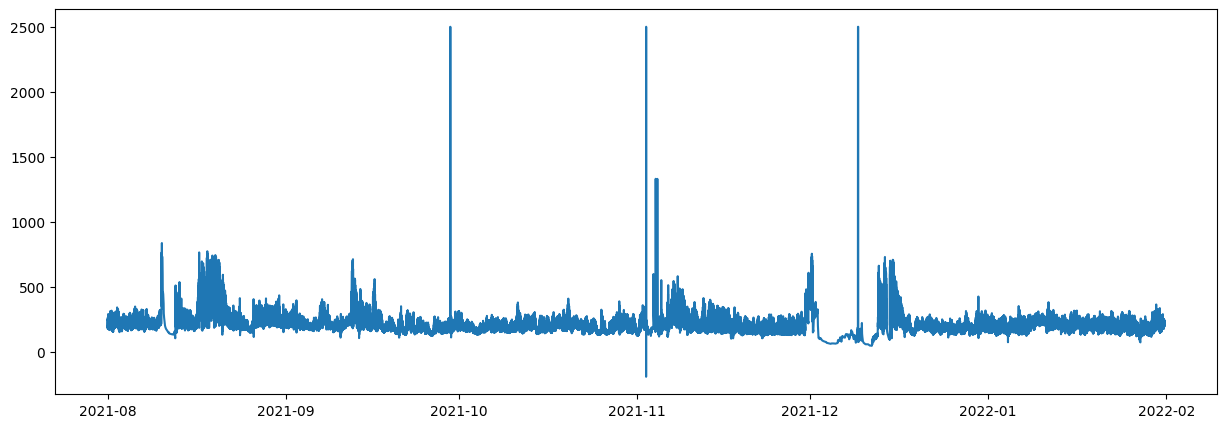

In [22]:

plt.plot(rc22, for_RNN_data_CIVS['SE_Uptake_f3'])


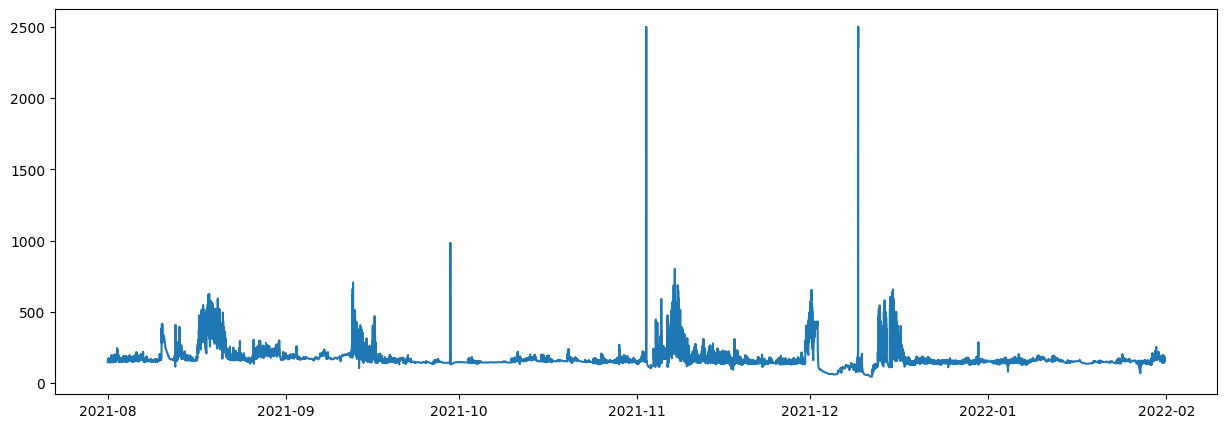

In [23]:

plt.plot(rc22, for_RNN_data_CIVS['NW_Uptake_f3'])


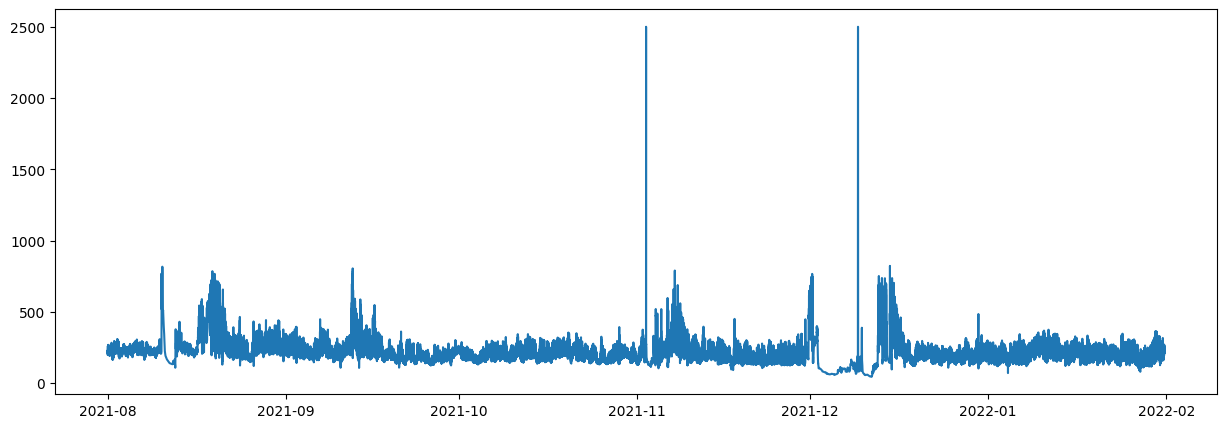

In [24]:

plt.plot(rc22, for_RNN_data_CIVS['SW_Uptake_f3'])


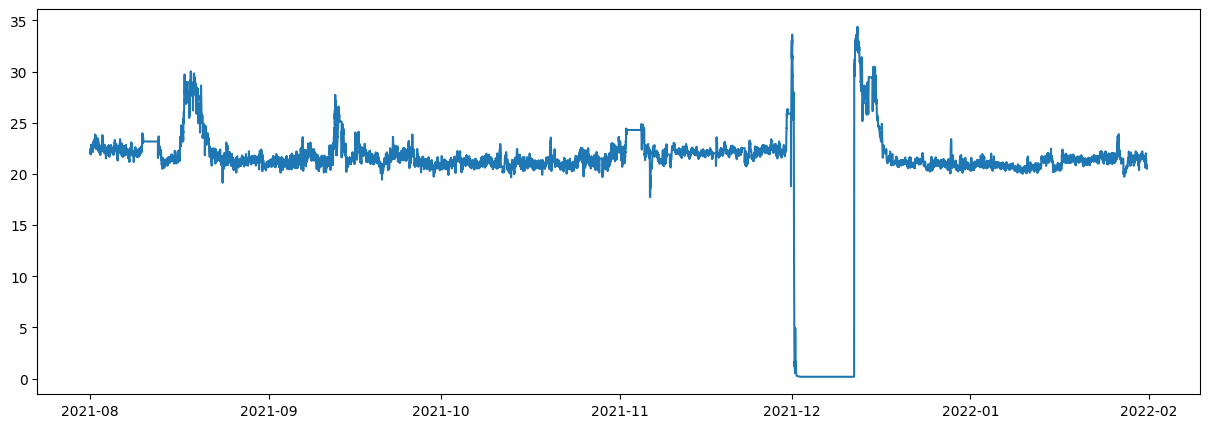

In [25]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO_f3'])


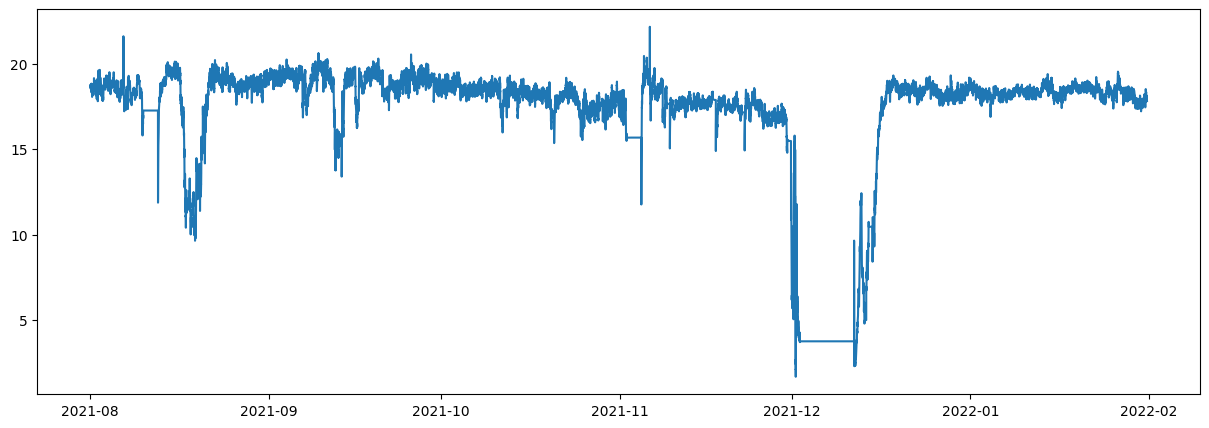

In [26]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO2_f3'])


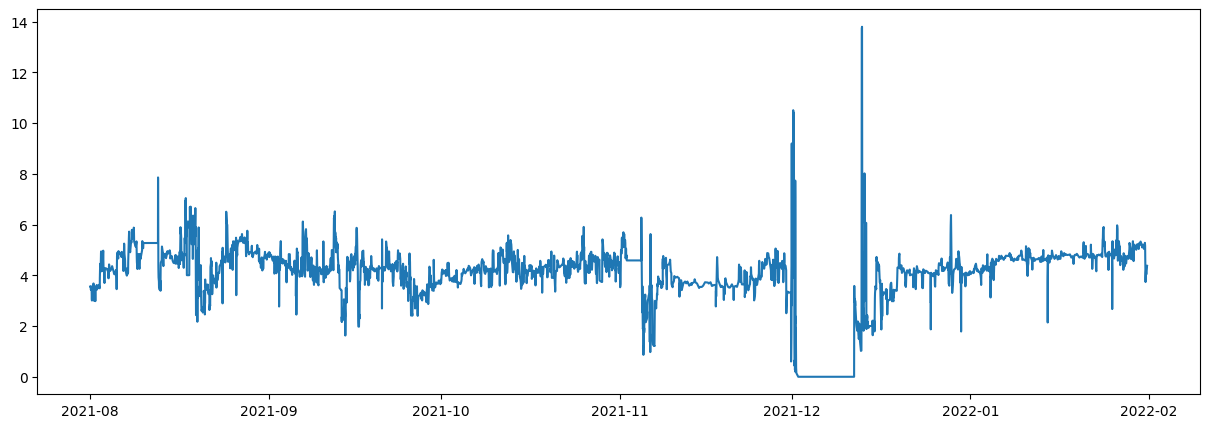

In [27]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_H2_f3'])


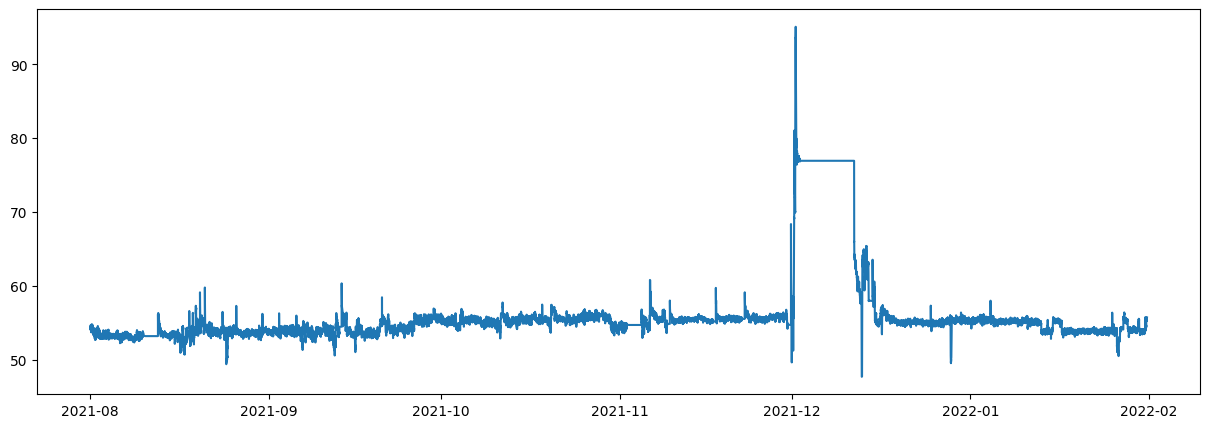

In [28]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_N2_f3'])


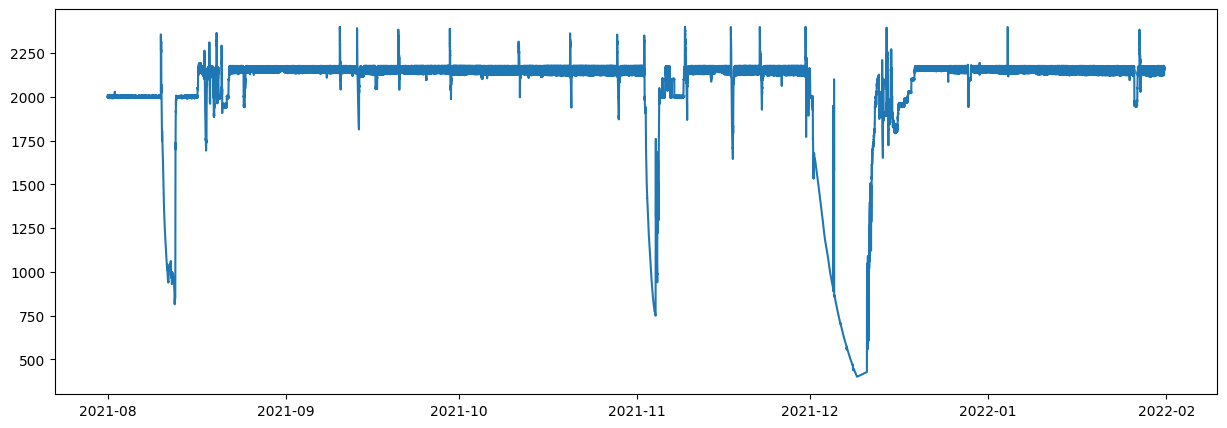

In [29]:

plt.plot(rc22, for_RNN_data_CIVS['HOT_BLAST_TMP_NS_f3'])


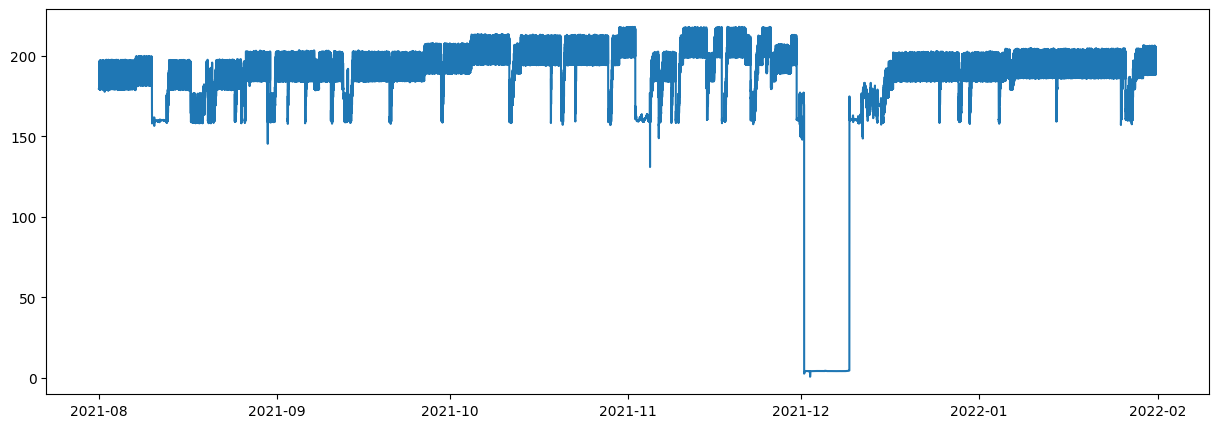

In [30]:

plt.plot(rc22, for_RNN_data_CIVS['WINDRATE_f3'])


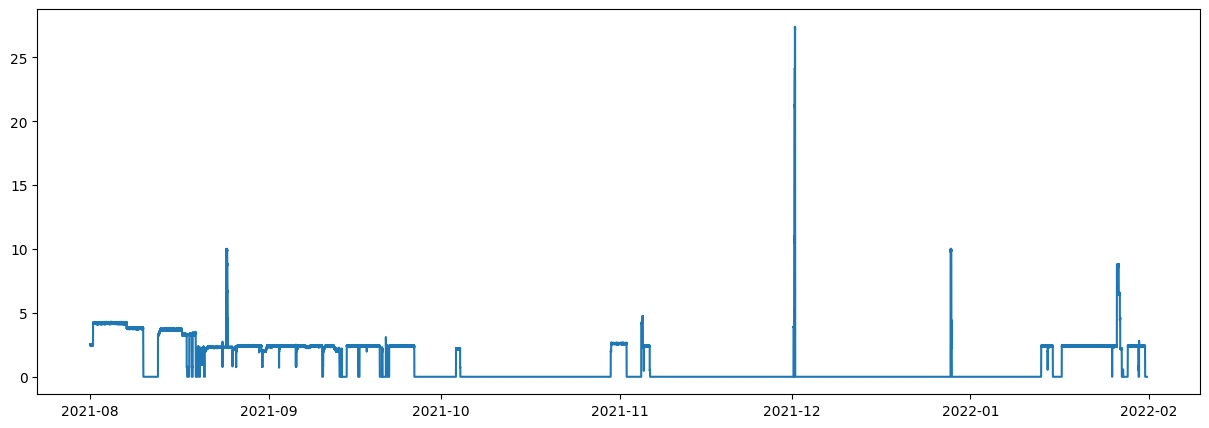

In [31]:

plt.plot(rc22, for_RNN_data_CIVS['HIGH_PURITY_OXYGEN_f3'])


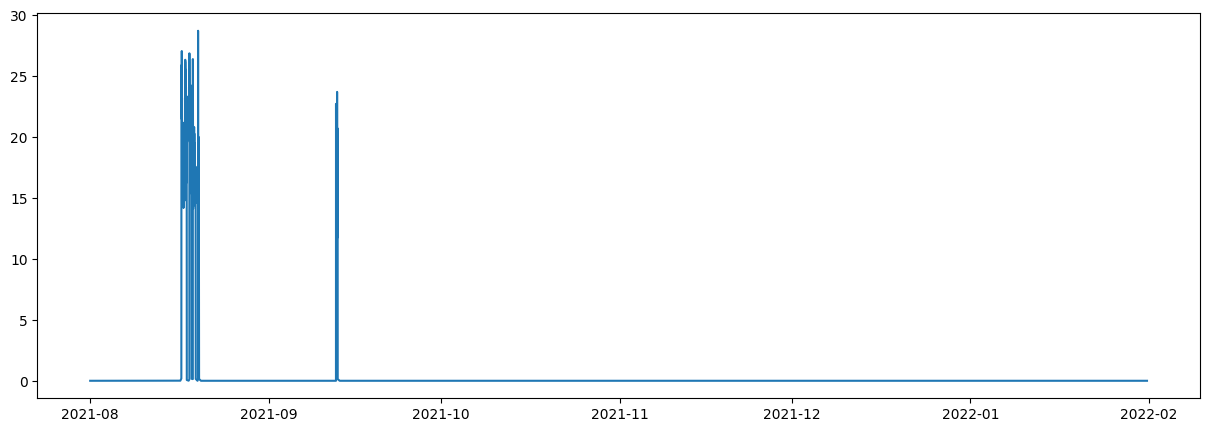

In [32]:

plt.plot(rc22, for_RNN_data_CIVS[ 'COAL_FLOW_f3'])


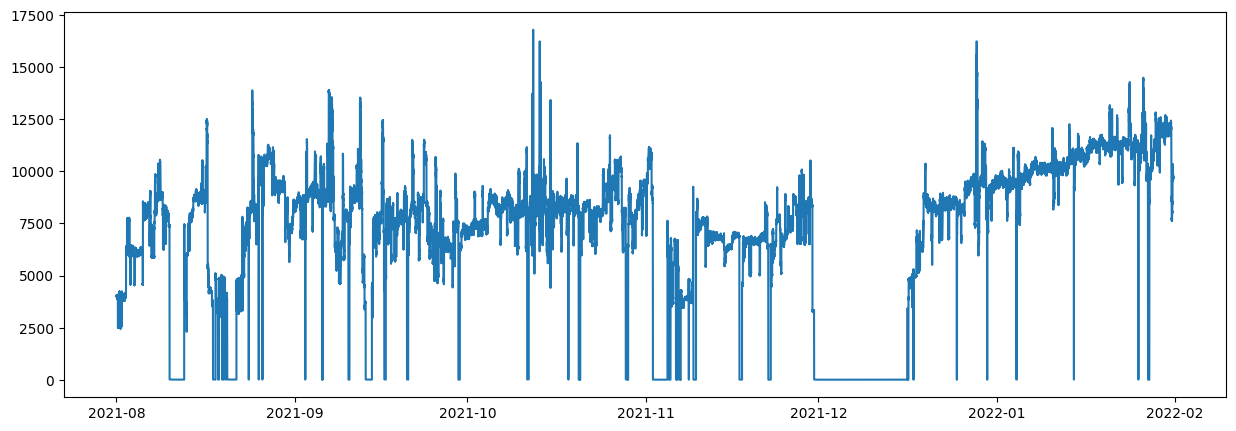

In [33]:

plt.plot(rc22, for_RNN_data_CIVS['NAT_GAS _INJECTION_f3'])


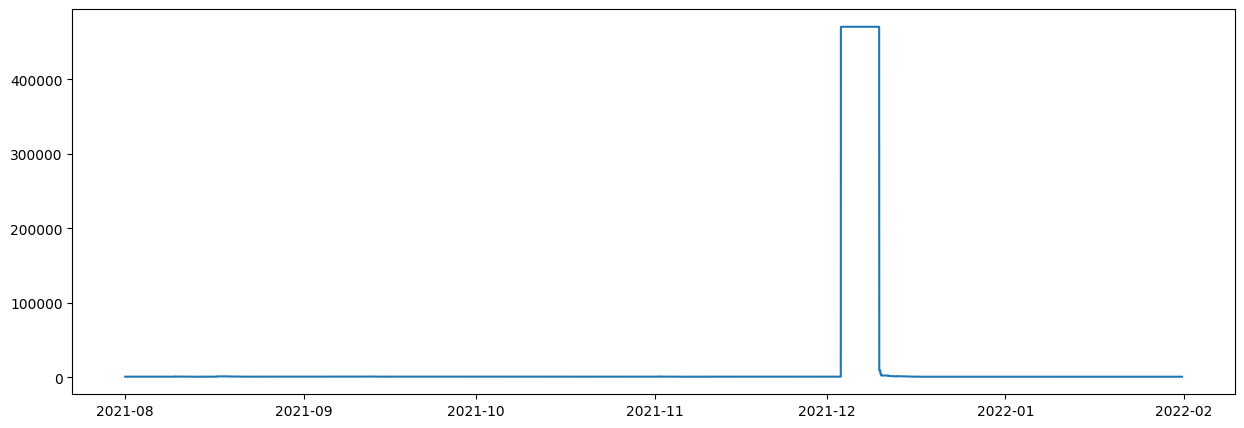

In [34]:

plt.plot(rc22, for_RNN_data_CIVS['Coke_Rate_f3'])


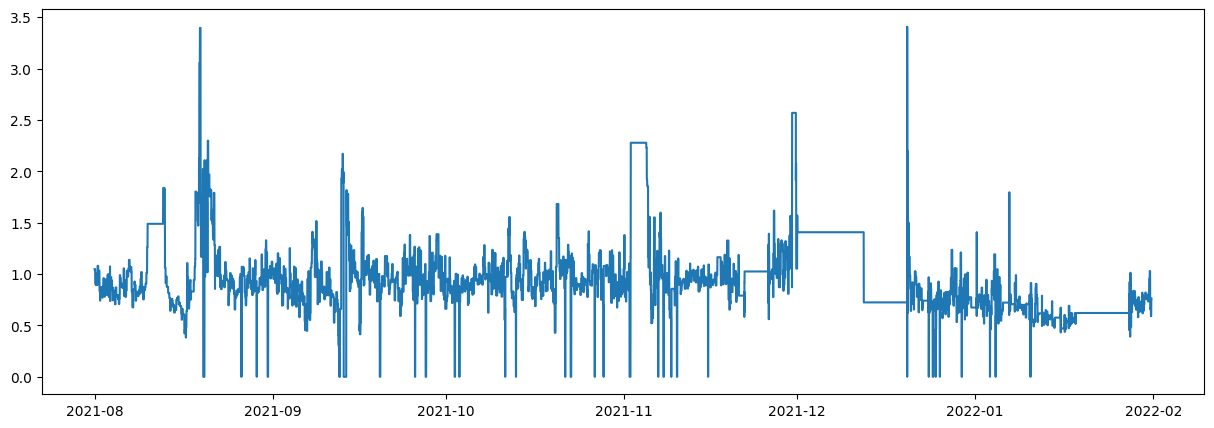

In [35]:

plt.plot(rc22, for_RNN_data_CIVS['Cast_Avg_Si_f2'])


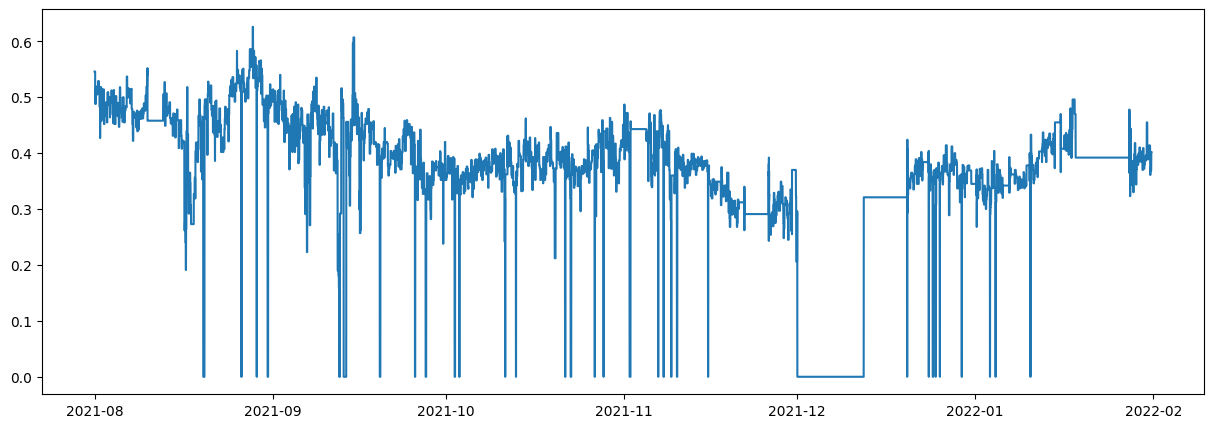

In [36]:

plt.plot(rc22, for_RNN_data_CIVS[ 'Cast_Avg_Mn_f2'])


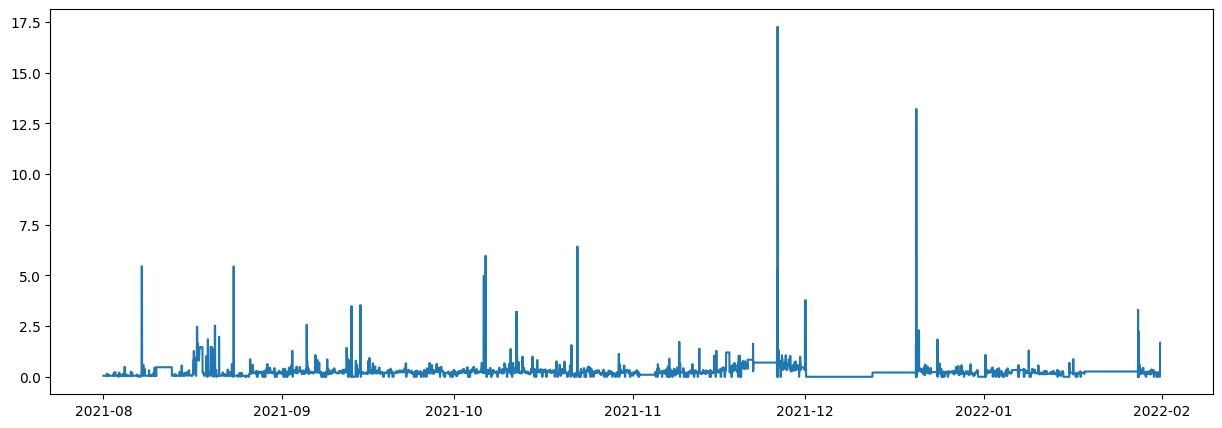

In [37]:

plt.plot(rc22, for_RNN_data_CIVS['Slag_Fe_f2'])



## Back to the Data Processing


In [38]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [39]:

## for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [40]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SI_f1                   265736 non-null  float64       
 1   MM_Timestamp_f1         265736 non-null  datetime64[ns]
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64       
 3   NE_Uptake_f3            265736 non-null  float64       
 4   SE_Uptake_f3            265736 non-null  float64       
 5   NW_Uptake_f3            265736 non-null  float64       
 6   SW_Uptake_f3            265736 non-null  float64       
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64       
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64       
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64       
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64       
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64       
 12  WINDRATE_f3             265736

In [41]:

for_RNN_data_CIVS


SI_f1     MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000 2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000 2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000 2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000 2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000 2021-08-01 00:04:00                8.064630    163.102736   
...          ...                 ...                     ...           ...   
265731  0.662065 2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446 2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826 2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207 2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587 2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4


## Iterate and mark transitions


In [42]:

for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control1',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control4',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control2',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control3',
                                value = 0)



for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              0         0         0         0  1.152000 2021-08-01 00:01:00   
2              0         0         0         0  1.152000 2021-08-01 00:02:00   
3              0         0         0         0  1.152000 2021-08-01 00:03:00   
4              0         0         0         0  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0         0         0         0  0.662065 2022-01-31 16:12:00   
265732         0         0         0         0  0.662446 2022-01-31 16:13:00   
265733         0         0         0         0  0.662826 2022-01-31 16:14:00   
265734         0         0         0         0  0.663207 2022-01-31 16:15:00   
265735         0         0         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

In [43]:

indeces_to_2500_control2 = []

indeces_to_2500 = [] 

counter_control2 = 0

counter = 500

prev_val = 0.0
    
for index, row in for_RNN_data_CIVS.iterrows():

    ## print( row["SI_f1"]  )
    #########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control1'] = counter
        counter = counter + 1
        indeces_to_2500.append( index )
    else:
        if counter > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1
            indeces_to_2500 = []
        else:
            indeces_to_2500 = []
        counter = 0

    ##########################################################################
    if row["SI_f1"] != prev_val:
        for_RNN_data_CIVS.at[index, 'control2'] = counter_control2
        counter_control2 = counter_control2 + 1
        indeces_to_2500_control2.append(  index  )
    else:
        if counter_control2 > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500_control2 ] = 1
            indeces_to_2500_control2 = []
        else:
            indeces_to_2500_control2 = []
        counter_control2 = 0

    ##########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control3'] = 1.0

    ##########################################################################
    if index  % 50000 == 0:
        print(index )
    prev_val = row["SI_f1"]
        
    

    


0
50000
100000
150000
200000
250000


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

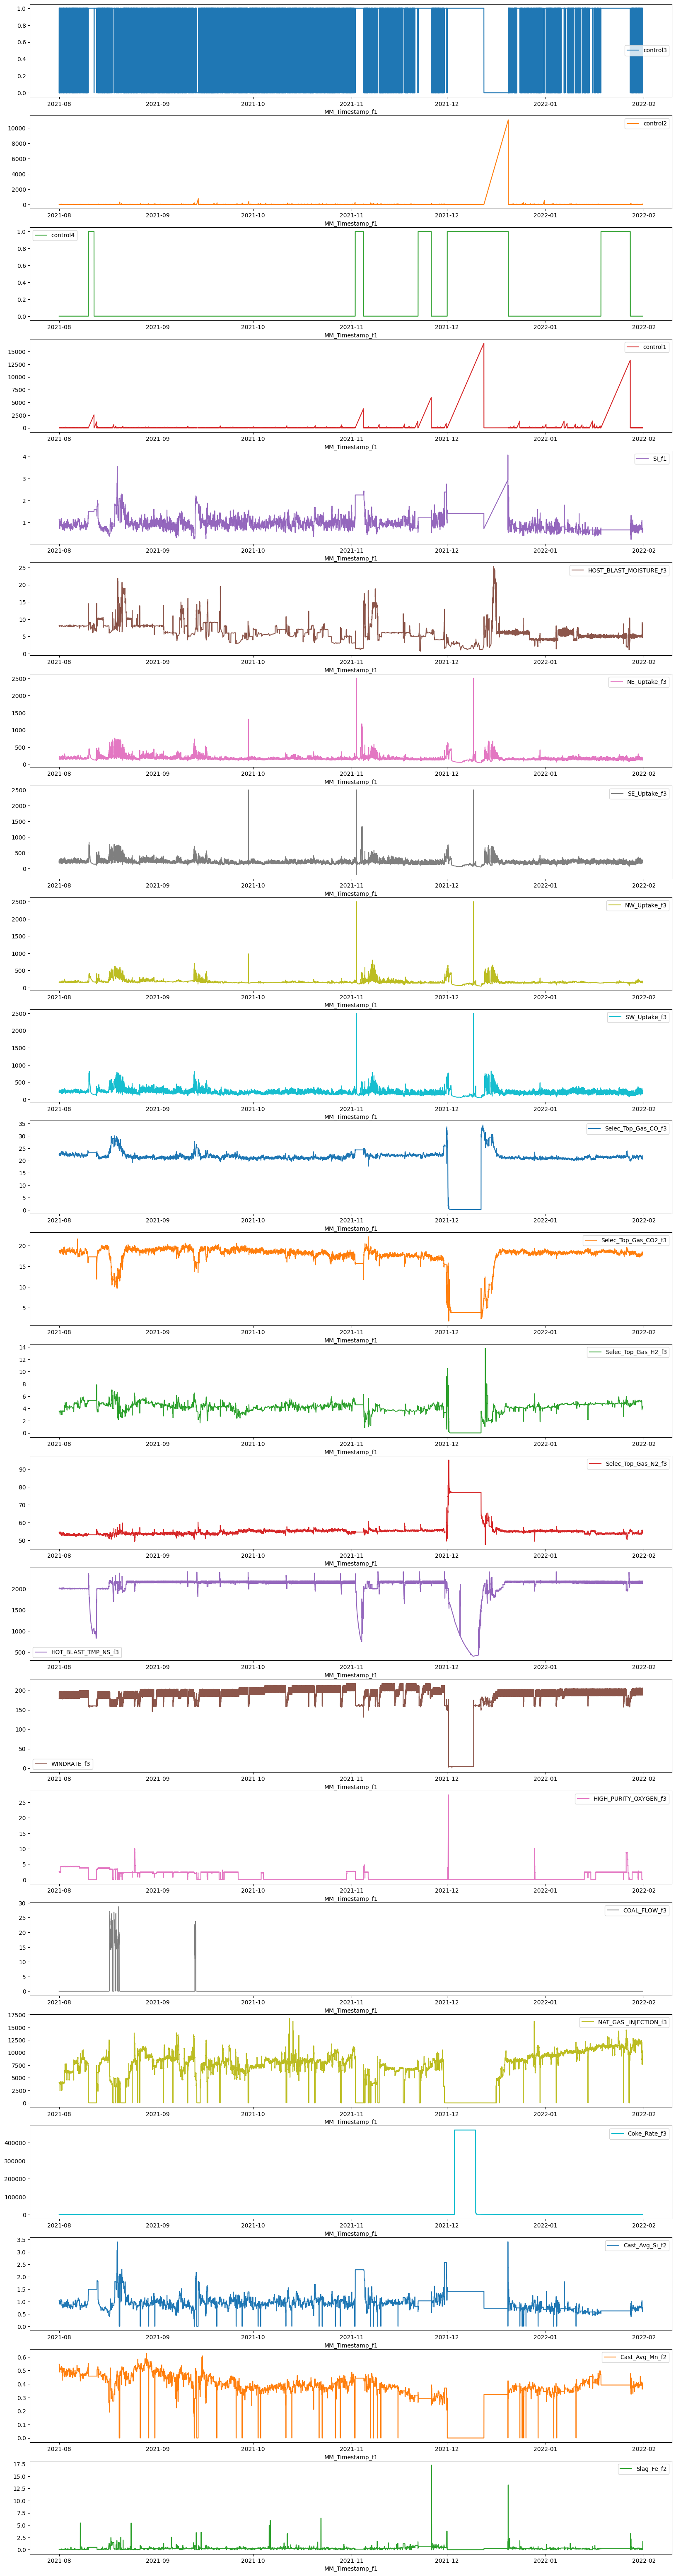

In [44]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [45]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0        57         0         0  0.662065 2022-01-31 16:12:00   
265732         0        58         0         0  0.662446 2022-01-31 16:13:00   
265733         0        59         0         0  0.662826 2022-01-31 16:14:00   
265734         0        60         0         0  0.663207 2022-01-31 16:15:00   
265735         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .


## Drop row with value above x


In [46]:

## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)

## for_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one


In [47]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0        57         0         0  0.662065 2022-01-31 16:12:00   
265732         0        58         0         0  0.662446 2022-01-31 16:13:00   
265733         0        59         0         0  0.662826 2022-01-31 16:14:00   
265734         0        60         0         0  0.663207 2022-01-31 16:15:00   
265735         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

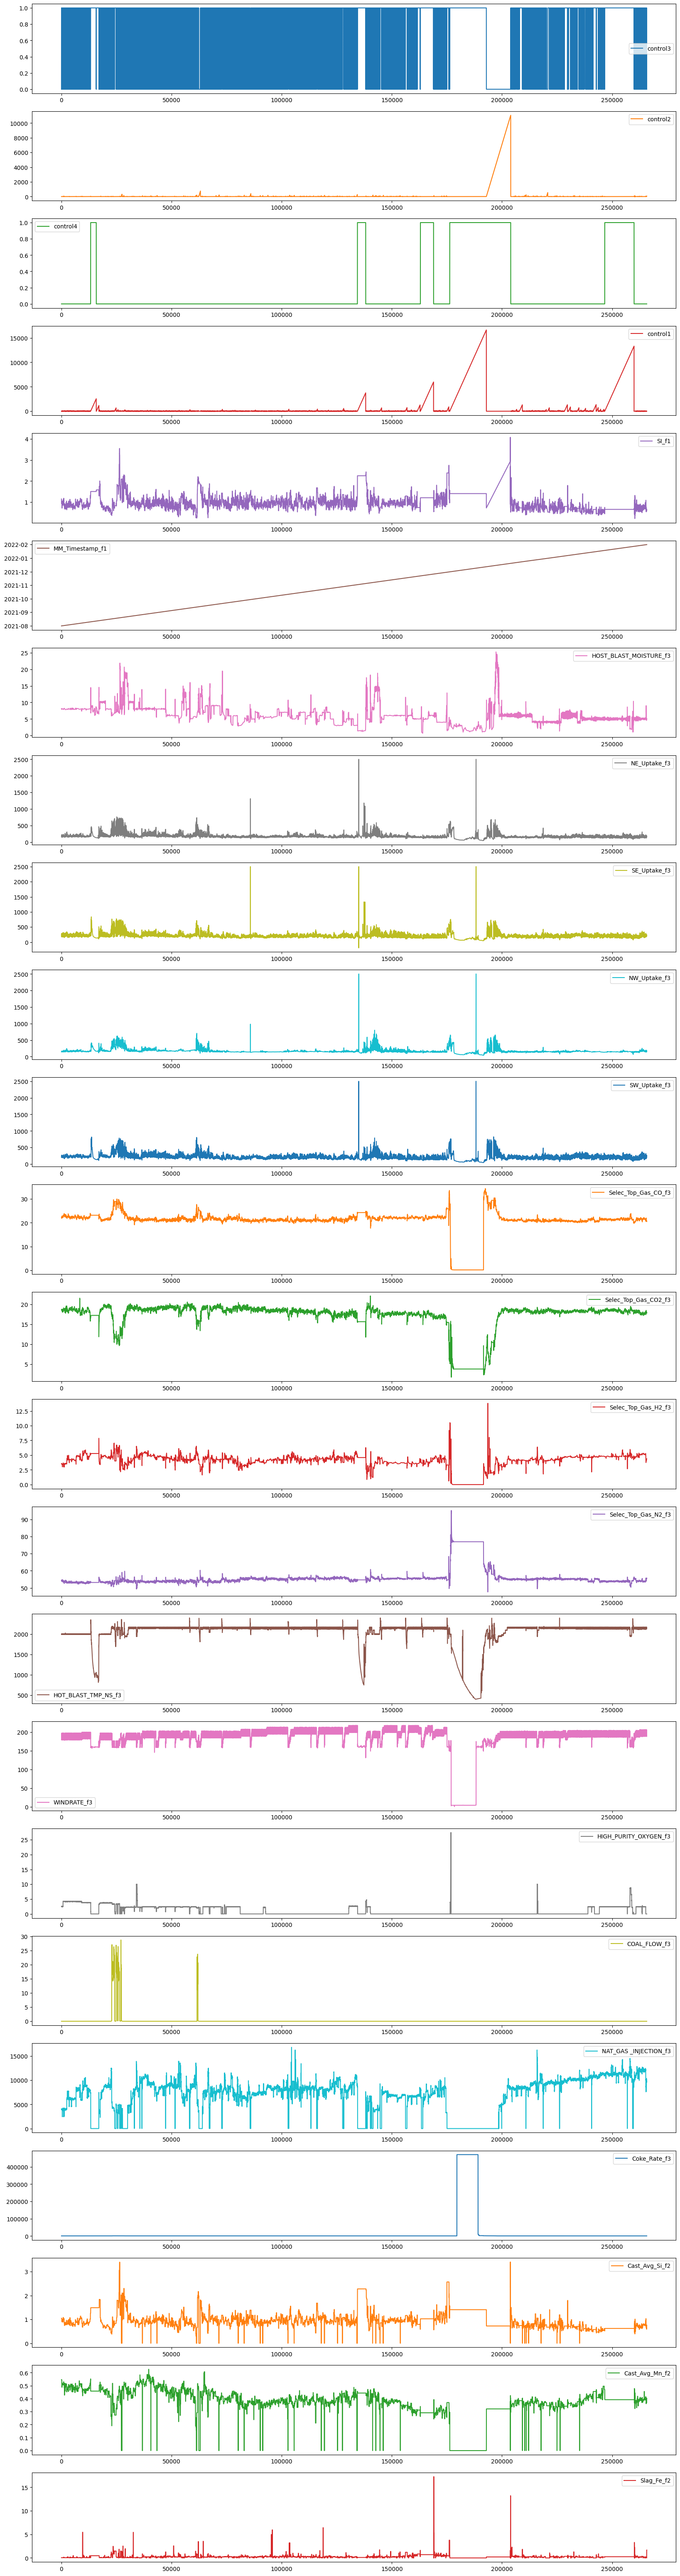

In [48]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [49]:

'''

ids = for_RNN_data_CIVS['SI_f1']
temp_for_RNN_data_CIVS = for_RNN_data_CIVS[ ( ids - ids.shift(1) )**2 > (0.05)**2 ]
temp_for_RNN_data_CIVS

'''


"\n\nids = for_RNN_data_CIVS['SI_f1']\ntemp_for_RNN_data_CIVS = for_RNN_data_CIVS[ ( ids - ids.shift(1) )**2 > (0.05)**2 ]\ntemp_for_RNN_data_CIVS\n\n"


## Remove date time columns 


In [50]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [51]:

for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [52]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   265736 non-null  float64
 1   HOST_BLAST_MOISTURE_f3  265736 non-null  float64
 2   NE_Uptake_f3            265736 non-null  float64
 3   SE_Uptake_f3            265736 non-null  float64
 4   NW_Uptake_f3            265736 non-null  float64
 5   SW_Uptake_f3            265736 non-null  float64
 6   Selec_Top_Gas_CO_f3     265736 non-null  float64
 7   Selec_Top_Gas_CO2_f3    265736 non-null  float64
 8   Selec_Top_Gas_H2_f3     265736 non-null  float64
 9   Selec_Top_Gas_N2_f3     265736 non-null  float64
 10  HOT_BLAST_TMP_NS_f3     265736 non-null  float64
 11  WINDRATE_f3             265736 non-null  float64
 12  HIGH_PURITY_OXYGEN_f3   265736 non-null  float64
 13  COAL_FLOW_f3            265736 non-null  float64
 14  NAT_GAS _INJECTION_f

In [53]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0       1.152000                8.084517    158.478922    245.634175   
1       1.152000                8.079545    159.637733    252.459217   
2       1.152000                8.074573    160.796544    252.645736   
3       1.152000                8.069602    161.955355    247.987563   
4       1.152000                8.064630    163.102736    226.923719   
...          ...                     ...           ...           ...   
265731  0.662065                5.155158    168.935281    202.117809   
265732  0.662446                5.161362    170.715532    202.106673   
265733  0.662826                5.167567    172.495783    205.875063   
265734  0.663207                5.173771    174.440392    212.764586   
265735  0.663587                5.179976    178.348950    219.654109   

        NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0         145.396538    220.717349            22.322068             18.729296   
1         145.570895    226.360600            22.335329             18.731320   
2         145.745252    230.297540            22.348590             18.733343   
3         145.919609    225.220292            22.361852             18.735367   
4         146.093966    218.827693            22.375113             18.737391   
...              ...           ...                  ...                   ...   
265731    163.555824    219.714757            20.510372             17.817248   
265732    164.493156    220.911245            20.510606             17.815391   
265733    165.430489    222.902059            20.510840             17.813534   
265734    166.688229    232.269437            20.511074             17.811677   
265735    170.012230    243.436510            20.511309             17.809820   

        Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                  3.559210            54.250139          1999.604384   
1                  3.559234            54.194257          2000.288837   
2                  3.559259            54.138374          1999.242862   
3                  3.559284            54.082797          1999.884442   
4                  3.559309            54.063779          1999.849729   
...                     ...                  ...                  ...   
265731             4.376637            55.682915          2162.689809   
265732             4.376798            55.688159          2162.438593   
265733             4.376959            55.693057          2162.032539   
265734             4.377119            55.697567          2160.858603   
265735             4.377280            55.698785          2159.580246   

        WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0        179.749638               2.510680           0.0   
1        179.765945               2.489381           0.0   
2        179.782251               2.489037           0.0   
3        179.798490               2.496867           0.0   
4        179.784430               2.501961           0.0   
...             ...                    ...           ...   
265731   188.599806               0.000000           0.0   
265732   188.536026               0.000000           0.0   
265733   189.264351               0.000000           0.0   
265734   189.426471               0.000000           0.0   
265735   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992           1.048           0.546   
4                 4000.467204           992           1.048           0.546   
...                       ...           ...             ...             ...   
265731            9680


## Average the rows to control time step


In [54]:

window                 = 30          ## seq length

silicon_feature_index  = 0

avg_the_rows_parameter = 15




## 1  ->  1 minute time step
## 15 -> 15 minute time step



## Sanity check


In [55]:



data = [
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30]
]



df_example = pd.DataFrame( data, columns=['a', 'b', 'c', 'd'] )
 

print(df_example)


     a   b   c   d
0   20   9  15  47
1    2  50  25  26
2    4  11  38  44
3    6  33  16  25
4    8  37  27  25
5   10  28  48  32
6   12  47  35  45
7   14   8  16   7
8   16  12  16  30
9   18  22  39  29
10  20   9  15  47
11  20   9  15  47
12   2  50  25  26
13   4  11  38  44
14   6  33  16  25
15   8  37  27  25
16  10  28  48  32
17  12  47  35  45
18  14   8  16   7
19  16  12  16  30
20  18  22  39  29
21  20   9  15  47
22   2  50  25  26
23   4  11  38  44
24   6  33  16  25
25   8  37  27  25
26  10  28  48  32
27  12  47  35  45
28  14   8  16   7
29  16  12  16  30


In [56]:

print(df_example.shape)


(30, 4)


In [57]:

avg_df_example = df_example.groupby(np.arange(len(df_example))//avg_the_rows_parameter).mean()
avg_df_example.shape


(2, 4)

In [58]:

avg_df_example


a          b     c          d
0  10.800000  24.600000  25.6  33.266667
1  11.333333  25.933333  27.8  29.933333


## Now Avg to change time step


In [59]:

## for_RNN_data_CIVS

print(for_RNN_data_CIVS.shape)


(265736, 19)


In [60]:

for_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()
for_RNN_data_CIVS.shape


(17716, 19)

In [61]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0      1.152000                8.049715    160.761075    218.217108   
1      1.064000                7.999296    156.698257    206.500542   
2      0.932000                8.115181    175.620299    222.058940   
3      0.932000                8.121816    174.671767    200.397736   
4      1.016667                8.096106    183.917112    223.414711   
...         ...                     ...           ...           ...   
17711  0.640533                4.948366    167.384696    213.324876   
17712  0.645326                4.986710    161.866446    210.049294   
17713  0.651033                5.019578    165.535087    213.294414   
17714  0.656739                5.069982    165.457569    213.129959   
17715  0.661685                5.148953    165.308843    205.748946   

       NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0        146.617037    212.574128            22.383071             18.730392   
1        149.232390    206.045298            22.237267             18.692622   
2        152.121945    227.672633            22.145789             18.648708   
3        157.604590    223.877374            22.116489             18.605391   
4        157.177569    238.170388            22.069156             18.578481   
...             ...           ...                  ...                   ...   
17711    164.083241    229.456443            20.879953             17.946540   
17712    161.197884    224.795525            20.847482             17.903936   
17713    164.536083    226.932888            20.733585             17.862083   
17714    162.451770    225.819197            20.552940             17.844923   
17715    161.961005    221.716490            20.510138             17.819488   

       Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                 3.559383            54.113751          1999.602255   
1                 3.559754            54.181407          1998.261413   
2                 3.560125            54.248577          2002.634825   
3                 3.560502            54.263899          2001.733678   
4                 3.561216            54.420489          1999.182763   
...                    ...                  ...                  ...   
17711             4.367160            55.305603          2167.009036   
17712             4.369570            55.364663          2170.571791   
17713             4.371979            55.537838          2167.717363   
17714             4.374389            55.630220          2159.326691   
17715             4.376477            55.681376          2162.637653   

       WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0       179.640197               2.496046           0.0   
1       181.837253               2.493510           0.0   
2       180.155421               2.510149           0.0   
3       179.992718               2.490400           0.0   
4       181.775303               2.511261           0.0   
...            ...                    ...           ...   
17711   191.423966               0.000000           0.0   
17712   189.426313               0.000000           0.0   
17713   189.347333               0.000000           0.0   
17714   191.262229               0.000000           0.0   
17715   189.024412               0.000000           0.0   

       NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                4022.760078         992.0        1.048000           0.546   
1                4016.187495         992.0        1.048000           0.546   
2                4009.812949         992.0        1.048000           0.546   
3                4016.463470         992.0        1.048000           0.546   
4                4010.887300         992.0        1.048000           0.546   
...                      ...           ...             ...             ...   
17711            9609.199407         924.0        0.590000           0.369  


## Create datasets of selected features


In [62]:

pd.options.display.max_columns = None


In [63]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'x_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## Make Data Sequential


In [64]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(17716, 19)
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       17676, 17677, 17678, 17679, 17680, 17681, 17682, 17683, 17684, 17685],
      dtype='int64', length=17686)
(17686,)
(17686, 30, 19)
(17686, 570)
(17686, 19)


In [65]:

res_multi_feature_df


x_1_fx_0  x_1_fx_1    x_1_fx_2    x_1_fx_3    x_1_fx_4    x_1_fx_5  \
0      1.152000  8.049715  160.761075  218.217108  146.617037  212.574128   
1      1.064000  7.999296  156.698257  206.500542  149.232390  206.045298   
2      0.932000  8.115181  175.620299  222.058940  152.121945  227.672633   
3      0.932000  8.121816  174.671767  200.397736  157.604590  223.877374   
4      1.016667  8.096106  183.917112  223.414711  157.177569  238.170388   
...         ...       ...         ...         ...         ...         ...   
17681  0.999000  5.038606  162.239451  208.428582  159.449844  200.933067   
17682  0.994286  5.282127  162.523650  212.537470  163.811815  206.095072   
17683  0.984184  5.250462  165.559387  217.274843  164.352804  211.696035   
17684  0.974082  5.183194  162.209434  211.526042  160.937600  208.375938   
17685  0.966449  5.115926  160.349214  212.677620  159.199194  207.505288   

        x_1_fx_6   x_1_fx_7  x_1_fx_8   x_1_fx_9    x_1_fx_10   x_1_fx_11  \
0      22.383071  18.730392  3.559383  54.113751  1999.602255  179.640197   
1      22.237267  18.692622  3.559754  54.181407  1998.261413  181.837253   
2      22.145789  18.648708  3.560125  54.248577  2002.634825  180.155421   
3      22.116489  18.605391  3.560502  54.263899  2001.733678  179.992718   
4      22.069156  18.578481  3.561216  54.420489  1999.182763  181.775303   
...          ...        ...       ...        ...          ...         ...   
17681  21.150392  17.852839  5.252735  54.054299  2146.830179  189.215313   
17682  21.123802  17.846138  5.221507  54.007875  2149.100289  191.357118   
17683  21.108017  17.790192  5.190279  54.089273  2173.206241  188.923791   
17684  20.971851  17.645170  5.082513  54.482302  2169.560055  189.296149   
17685  20.775612  17.497709  4.843970  55.068247  2166.397011  191.706888   

       x_1_fx_12  x_1_fx_13     x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  \
0       2.496046        0.0   4022.760078      992.0      1.048      0.546   
1       2.493510        0.0   4016.187495      992.0      1.048      0.546   
2       2.510149        0.0   4009.812949      992.0      1.048      0.546   
3       2.490400        0.0   4016.463470      992.0      1.048      0.546   
4       2.511261        0.0   4010.887300      992.0      1.048      0.546   
...          ...        ...           ...        ...        ...        ...   
17681   2.397255        0.0  12013.554373      873.0      0.950      0.414   
17682   2.387636        0.0  12014.195555      873.0      0.950      0.414   
17683   0.602774        0.0  11583.027220      873.0      0.950      0.414   
17684   0.000000        0.0  10348.394642      873.0      0.950      0.414   
17685   0.000000        0.0  10084.010497      873.0      0.950      0.414   

       x_1_fx_18  x_2_fx_0  x_2_fx_1    x_2_fx_2    x_2_fx_3    x_2_fx_4  \
0           0.05  1.064000  7.999296  156.698257  206.500542  149.232390   
1           0.05  0.932000  8.115181  175.620299  222.058940  152.121945   
2           0.05  0.932000  8.121816  174.671767  200.397736  157.604590   
3           0.05  1.016667  8.096106  183.917112  223.414711  157.177569   
4           0.05  1.059000  8.070396  178.778252  219.278276  156.737249   
...          ...       ...       ...         ...         ...         ...   
17681       0.18  0.994286  5.282127  162.523650  212.537470  163.811815   
17682       0.18  0.984184  5.250462  165.559387  217.274843  164.352804   
17683       0.18  0.974082  5.183194  162.209434  211.526042  160.937600   
17684       0.18  0.966449  5.115926  160.349214  212.677620  159.199194   
17685       0.18  0.966000  5.048658  175.670103  246.872691  166.824965   

         x_2_fx_5   x_2_fx_6   x_2_fx_7  x_2_fx_8   x_2_fx_9    x_2_fx_10  \
0      206.045298  22.237267  18.692622  3.559754  54.181407  1998.261413   
1      227.672633  22.145789  18.648708  3.560125  54.248577  2002.634825   
2      223.877374  22.116489  18.605391  3.560502  54.263899  2001.733678   

In [66]:

print( res_multi_feature_df.shape )


(17686, 589)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [67]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(17686, 559)


In [68]:

print( res_multi_feature_df.shape )


(17686, 559)


In [69]:

res_multi_feature_df


x_1_fx_1    x_1_fx_2    x_1_fx_3    x_1_fx_4    x_1_fx_5   x_1_fx_6  \
0      8.049715  160.761075  218.217108  146.617037  212.574128  22.383071   
1      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
2      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
3      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
4      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
...         ...         ...         ...         ...         ...        ...   
17681  5.038606  162.239451  208.428582  159.449844  200.933067  21.150392   
17682  5.282127  162.523650  212.537470  163.811815  206.095072  21.123802   
17683  5.250462  165.559387  217.274843  164.352804  211.696035  21.108017   
17684  5.183194  162.209434  211.526042  160.937600  208.375938  20.971851   
17685  5.115926  160.349214  212.677620  159.199194  207.505288  20.775612   

        x_1_fx_7  x_1_fx_8   x_1_fx_9    x_1_fx_10   x_1_fx_11  x_1_fx_12  \
0      18.730392  3.559383  54.113751  1999.602255  179.640197   2.496046   
1      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
2      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
3      18.605391  3.560502  54.263899  2001.733678  179.992718   2.490400   
4      18.578481  3.561216  54.420489  1999.182763  181.775303   2.511261   
...          ...       ...        ...          ...         ...        ...   
17681  17.852839  5.252735  54.054299  2146.830179  189.215313   2.397255   
17682  17.846138  5.221507  54.007875  2149.100289  191.357118   2.387636   
17683  17.790192  5.190279  54.089273  2173.206241  188.923791   0.602774   
17684  17.645170  5.082513  54.482302  2169.560055  189.296149   0.000000   
17685  17.497709  4.843970  55.068247  2166.397011  191.706888   0.000000   

       x_1_fx_13     x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  x_1_fx_18  \
0            0.0   4022.760078      992.0      1.048      0.546       0.05   
1            0.0   4016.187495      992.0      1.048      0.546       0.05   
2            0.0   4009.812949      992.0      1.048      0.546       0.05   
3            0.0   4016.463470      992.0      1.048      0.546       0.05   
4            0.0   4010.887300      992.0      1.048      0.546       0.05   
...          ...           ...        ...        ...        ...        ...   
17681        0.0  12013.554373      873.0      0.950      0.414       0.18   
17682        0.0  12014.195555      873.0      0.950      0.414       0.18   
17683        0.0  11583.027220      873.0      0.950      0.414       0.18   
17684        0.0  10348.394642      873.0      0.950      0.414       0.18   
17685        0.0  10084.010497      873.0      0.950      0.414       0.18   

       x_2_fx_1    x_2_fx_2    x_2_fx_3    x_2_fx_4    x_2_fx_5   x_2_fx_6  \
0      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
1      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
2      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
3      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
4      8.070396  178.778252  219.278276  156.737249  234.887652  22.068513   
...         ...         ...         ...         ...         ...        ...   
17681  5.282127  162.523650  212.537470  163.811815  206.095072  21.123802   
17682  5.250462  165.559387  217.274843  164.352804  211.696035  21.108017   
17683  5.183194  162.209434  211.526042  160.937600  208.375938  20.971851   
17684  5.115926  160.349214  212.677620  159.199194  207.505288  20.775612   
17685  5.048658  175.670103  246.872691  166.824965  259.613660  20.762760   

        x_2_fx_7  x_2_fx_8   x_2_fx_9    x_2_fx_10   x_2_fx_11  x_2_fx_12  \
0      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
1      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
2      18.605391  3.560502  54.263899  2


## Drop last in X input sequence

* predict the one not seen , i think




In [70]:

window_str = str(window)
window_str


'30'

In [71]:

string_match_last_seq = "x_" + window_str
string_match_last_seq 


'x_30'

In [72]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(17686, 541)


In [73]:

print( res_multi_feature_df.shape )


(17686, 541)


In [74]:

res_multi_feature_df


x_1_fx_1    x_1_fx_2    x_1_fx_3    x_1_fx_4    x_1_fx_5   x_1_fx_6  \
0      8.049715  160.761075  218.217108  146.617037  212.574128  22.383071   
1      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
2      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
3      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
4      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
...         ...         ...         ...         ...         ...        ...   
17681  5.038606  162.239451  208.428582  159.449844  200.933067  21.150392   
17682  5.282127  162.523650  212.537470  163.811815  206.095072  21.123802   
17683  5.250462  165.559387  217.274843  164.352804  211.696035  21.108017   
17684  5.183194  162.209434  211.526042  160.937600  208.375938  20.971851   
17685  5.115926  160.349214  212.677620  159.199194  207.505288  20.775612   

        x_1_fx_7  x_1_fx_8   x_1_fx_9    x_1_fx_10   x_1_fx_11  x_1_fx_12  \
0      18.730392  3.559383  54.113751  1999.602255  179.640197   2.496046   
1      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
2      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
3      18.605391  3.560502  54.263899  2001.733678  179.992718   2.490400   
4      18.578481  3.561216  54.420489  1999.182763  181.775303   2.511261   
...          ...       ...        ...          ...         ...        ...   
17681  17.852839  5.252735  54.054299  2146.830179  189.215313   2.397255   
17682  17.846138  5.221507  54.007875  2149.100289  191.357118   2.387636   
17683  17.790192  5.190279  54.089273  2173.206241  188.923791   0.602774   
17684  17.645170  5.082513  54.482302  2169.560055  189.296149   0.000000   
17685  17.497709  4.843970  55.068247  2166.397011  191.706888   0.000000   

       x_1_fx_13     x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  x_1_fx_18  \
0            0.0   4022.760078      992.0      1.048      0.546       0.05   
1            0.0   4016.187495      992.0      1.048      0.546       0.05   
2            0.0   4009.812949      992.0      1.048      0.546       0.05   
3            0.0   4016.463470      992.0      1.048      0.546       0.05   
4            0.0   4010.887300      992.0      1.048      0.546       0.05   
...          ...           ...        ...        ...        ...        ...   
17681        0.0  12013.554373      873.0      0.950      0.414       0.18   
17682        0.0  12014.195555      873.0      0.950      0.414       0.18   
17683        0.0  11583.027220      873.0      0.950      0.414       0.18   
17684        0.0  10348.394642      873.0      0.950      0.414       0.18   
17685        0.0  10084.010497      873.0      0.950      0.414       0.18   

       x_2_fx_1    x_2_fx_2    x_2_fx_3    x_2_fx_4    x_2_fx_5   x_2_fx_6  \
0      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
1      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
2      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
3      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
4      8.070396  178.778252  219.278276  156.737249  234.887652  22.068513   
...         ...         ...         ...         ...         ...        ...   
17681  5.282127  162.523650  212.537470  163.811815  206.095072  21.123802   
17682  5.250462  165.559387  217.274843  164.352804  211.696035  21.108017   
17683  5.183194  162.209434  211.526042  160.937600  208.375938  20.971851   
17684  5.115926  160.349214  212.677620  159.199194  207.505288  20.775612   
17685  5.048658  175.670103  246.872691  166.824965  259.613660  20.762760   

        x_2_fx_7  x_2_fx_8   x_2_fx_9    x_2_fx_10   x_2_fx_11  x_2_fx_12  \
0      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
1      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
2      18.605391  3.560502  54.263899  2


## Need to adjust windows based on previous step


In [75]:


window = window - 1
window


29


## Utility Functions


In [76]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        the_sigma = self.sigma[-19:]
        the_mu    = self.mu[-19:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [77]:

'''

x = np.expand_dims(x, axis=0)

'''


'\n\nx = np.expand_dims(x, axis=0)\n\n'

In [78]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [79]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [80]:

train_si


x_1_fx_1  x_1_fx_2  x_1_fx_3  x_1_fx_4  x_1_fx_5  x_1_fx_6  x_1_fx_7  \
0      0.521057 -0.396926  0.038749 -0.553621 -0.131737  0.351823  0.448878   
1      0.500893 -0.461066 -0.134226 -0.506689 -0.227634  0.244226  0.421578   
2      0.547239 -0.162339  0.095467 -0.454837  0.090034  0.176719  0.389839   
3      0.549893 -0.177314 -0.224323 -0.356452  0.034288  0.155097  0.358530   
4      0.539611 -0.031355  0.115483 -0.364115  0.244228  0.120168  0.339080   
...         ...       ...       ...       ...       ...       ...       ...   
11315 -0.358760 -0.601594 -0.330017 -0.449539 -0.675537  0.493426 -1.135445   
11316 -0.369205 -0.591302 -0.507181 -0.475800 -0.776579  0.339484 -1.034548   
11317 -0.337062 -0.563933 -0.605662 -0.526019 -0.819030  0.230624 -0.966261   
11318 -0.135589 -0.430255 -0.341187 -0.457219 -0.580695  0.134609 -1.045067   
11319 -0.302012 -0.493298 -0.383675 -0.450990 -0.453390  0.127151 -1.074444   

       x_1_fx_8  x_1_fx_9  x_1_fx_10  x_1_fx_11  x_1_fx_12  x_1_fx_13  \
0     -0.975051 -0.448170  -0.441849  -0.468707   0.788794  -0.139097   
1     -0.974510 -0.384922  -0.448158  -0.283639   0.787121  -0.139097   
2     -0.973969 -0.322128  -0.427581  -0.425308   0.798098  -0.139097   
3     -0.973420 -0.307804  -0.431821  -0.439013   0.785069  -0.139097   
4     -0.972379 -0.161416  -0.443823  -0.288857   0.798832  -0.139097   
...         ...       ...        ...        ...        ...        ...   
11315  0.925796  0.527136   0.360309   0.411595  -0.857929  -0.139097   
11316  0.949270  0.548453   0.354539   0.407372  -0.857929  -0.139097   
11317  0.948794  0.668162   0.333619   0.560241  -0.857929  -0.139097   
11318  0.947998  0.797780   0.318241   0.408429  -0.857929  -0.139097   
11319  0.947202  0.946273   0.290800   0.392647  -0.857929  -0.139097   

       x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  x_1_fx_18  x_2_fx_1  \
0      -0.944715   0.381914   0.137197   1.649298  -0.578480  0.500968   
1      -0.947014   0.381914   0.137197   1.649298  -0.578480  0.547315   
2      -0.949243   0.381914   0.137197   1.649298  -0.578480  0.549969   
3      -0.946917   0.381914   0.137197   1.649298  -0.578480  0.539686   
4      -0.948867   0.381914   0.137197   1.649298  -0.578480  0.529404   
...          ...        ...        ...        ...        ...       ...   
11315   0.743494  -0.556540  -0.140122  -1.431943   0.651741 -0.369137   
11316   0.748934  -0.556540  -0.140122  -1.431943   0.651741 -0.336994   
11317   0.695114  -0.556540  -0.104278  -1.407416   0.472237 -0.135519   
11318   0.688685  -0.556540   0.128707  -1.247988  -0.694538 -0.301943   
11319   0.694580  -0.556540   0.128707  -1.247988  -0.694538 -0.284064   

       x_2_fx_2  x_2_fx_3  x_2_fx_4  x_2_fx_5  x_2_fx_6  x_2_fx_7  x_2_fx_8  \
0     -0.461072 -0.134221 -0.506711 -0.227643  0.244234  0.421695 -0.974682   
1     -0.162345  0.095472 -0.454859  0.090026  0.176728  0.389957 -0.974141   
2     -0.177319 -0.224319 -0.356473  0.034280  0.155105  0.358650 -0.973592   
3     -0.031361  0.115488 -0.364136  0.244220  0.120176  0.339201 -0.972551   
4     -0.112489  0.054420 -0.372038  0.196002  0.119701  0.325102 -0.971218   
...         ...       ...       ...       ...       ...       ...       ...   
11315 -0.591309 -0.507177 -0.475822 -0.776588  0.339492 -1.034369  0.949102   
11316 -0.563939 -0.605657 -0.526041 -0.819039  0.230633 -0.966085  0.948626   
11317 -0.430261 -0.341182 -0.457241 -0.580704  0.134617 -1.044888  0.947830   
11318 -0.493304 -0.383670 -0.451012 -0.453399  0.127159 -1.074263  0.947034   
11319 -0.339352 -0.014925 -0.348699 -0.033700  0.262290 -1.076806  0.946238   

       x_2_fx_9  x_2_fx_10  x_2_fx_11  x_2_fx_12  x_2_fx_13  x_2_fx_14  \
0     -0.385027  -0.448219  -0.283730   0.787263  -0.139097  -0.947176   
1     -0.322234  -0.427642  -0.425398   0.798240  -0.139097  -0.949405   
2     -0.307911  -0.431882  -0.439103   0.785211  -0.139097  -0.947079   
3     -0.161526  -0.443884  -0.288948   0.79897


## Some Sanity Checks


In [81]:

print( scale_civs.split)


0.2


In [82]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 11320 , val:2829, test: 3537 



In [83]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [84]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [85]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [86]:

def Convert_to_RNN_tensors( list_data_civs ):
    
    y = [ torch.from_numpy(  col.iloc[ :,  -19: ].values.reshape(-1, 19)                         ).float()   for col in list_data_civs ]
    x = [ torch.from_numpy(  col.iloc[ :, :-19 ].values.reshape( *col.iloc[ :, :-19 ].shape )  ).float()   for col in list_data_civs ]
    
    return y, x


In [87]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [88]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [89]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([11320, 19])
torch.Size([2829, 19])
torch.Size([3537, 19])
torch.Size([11320, 522])
torch.Size([2829, 522])
torch.Size([3537, 522])



## Parameters (set these manually)


In [90]:

params_si = {
'seq_length': window,       ## this is the window
'input_size': 18,  ## 4,            ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':19,
'units': 40,         ## 32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr': 0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [91]:

test_si.index


Index([14149, 14150, 14151, 14152, 14153, 14154, 14155, 14156, 14157, 14158,
       ...
       17676, 17677, 17678, 17679, 17680, 17681, 17682, 17683, 17684, 17685],
      dtype='int64', length=3537)

In [92]:

265706 - 212565


53141


## Training Function



In [93]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data
  
        loss    = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Inference Utility functions


In [94]:

def bins_inference_model_pt(model, x_test, y_test ):

    model_type='RNN'

    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            
            y_pred, h0 = model( input_test_x , h0 )
           
            
            temp_x_test = input_test_x[:, 18:]
            
            concat_part = y_pred[:, 1:]
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 
            y_real_si     = y_test[i, 0].detach().numpy() 


            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    l_real = list_real_si
    l_pred = list_pred_si
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.plot(x, l_real, label = "real", color='red') 
    plt.plot(x, l_pred, label = "pred", color='blue') 
    plt.legend() 
    plt.show()

## return list_real_si, list_pred_si
            


In [95]:


def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ## print(y_pred)
            
            ## print("y_pred", y_pred.shape)
            
            ## temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            ## concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            ## new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            ## input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [96]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ##############################
            ## print(y_pred[:, 1:])
            ## print(x_test[i, -18:])
            ## input()
            ##############################
            
            ## print("y_pred", y_pred.shape)
            
            temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



## Normal RNN


In [97]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)

        
        self.fc1        = nn.Linear(n_features, 30)
        self.relu       = nn.ReLU()
        self.fc2        = nn.Linear(30, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
        ## -> (seq_length,  batch_size,     input_size)
        
        ## x = x.view(x.shape[1], x.shape[0], x.shape[2])

        x = x.permute(1, 0, 2)

        ## print(x.shape)
        ## input()
        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)

        ########################################
        ## original      
        ## output = self.fc( hn )
        ########################################
        ## remove
        output = self.fc1( hn )
        output = self.relu( output ) 
        output = self.fc2( output )
        ########################################
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


In [98]:
'''
 def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        return ( data * self.sigma[-19:] ) + self.mu[-19:]      ## last one

'''

'\n def inverse_y(self, data):\n        print(self.sigma.shape)\n        print(self.mu.shape)\n        print(self.mu[-19:].shape)\n        print(self.sigma[-19:].shape)\n        print(data.shape)\n        return ( data * self.sigma[-19:] ) + self.mu[-19:]      ## last one\n\n'

0/500 - Loss:  1.0172618627548218, val_loss: 0.9666937589645386
25/500 - Loss:  0.2625485062599182, val_loss: 0.3506033718585968
50/500 - Loss:  0.16845744848251343, val_loss: 0.24050824344158173
75/500 - Loss:  0.144541934132576, val_loss: 0.21317283809185028
100/500 - Loss:  0.12581554055213928, val_loss: 0.1800464391708374
125/500 - Loss:  0.11732880771160126, val_loss: 0.16249319911003113
150/500 - Loss:  0.11194455623626709, val_loss: 0.14575980603694916
175/500 - Loss:  0.10540261119604111, val_loss: 0.13617369532585144
200/500 - Loss:  0.10212698578834534, val_loss: 0.12888583540916443
225/500 - Loss:  0.10011748224496841, val_loss: 0.12541918456554413
250/500 - Loss:  0.0966029167175293, val_loss: 0.1215863823890686
275/500 - Loss:  0.09451531618833542, val_loss: 0.1177598312497139
300/500 - Loss:  0.09524033218622208, val_loss: 0.11926887184381485
325/500 - Loss:  0.09191693365573883, val_loss: 0.11522136628627777
350/500 - Loss:  0.09193585067987442, val_loss: 0.1160825043916

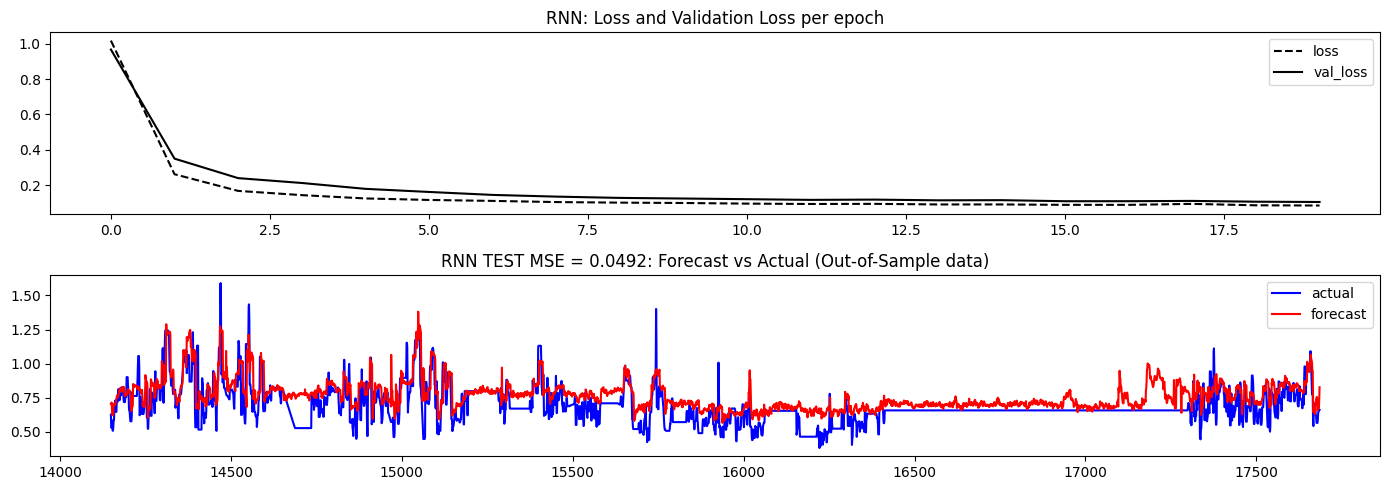

In [99]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference simple RNN



## Inference sanity check first


In [100]:

model = si_normal_rnn


In [101]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0


In [102]:

l_real[:20]


[0.6265333454586078,
 0.5299999526716427,
 0.5299999526716427,
 0.5299999526716427,
 0.5818666745741667,
 0.5080000281322947,
 0.5080000281322947,
 0.5343333667214429,
 0.587000002669182,
 0.587000002669182,
 0.6580000121427712,
 0.6580000121427712,
 0.7108000083286032,
 0.7300000275569118,
 0.7020000261436969,
 0.6460000233172668,
 0.6460000233172668,
 0.71506669072116,
 0.720000029997232,
 0.7201333696200467]

In [103]:

l_pred[:20]


[array([0.70507205], dtype=float32),
 array([0.70763105], dtype=float32),
 array([0.71481085], dtype=float32),
 array([0.67341983], dtype=float32),
 array([0.6250166], dtype=float32),
 array([0.64054275], dtype=float32),
 array([0.62851083], dtype=float32),
 array([0.6260263], dtype=float32),
 array([0.7054716], dtype=float32),
 array([0.70381075], dtype=float32),
 array([0.69796836], dtype=float32),
 array([0.6935475], dtype=float32),
 array([0.6975498], dtype=float32),
 array([0.70826507], dtype=float32),
 array([0.7090045], dtype=float32),
 array([0.7283498], dtype=float32),
 array([0.7439468], dtype=float32),
 array([0.75240815], dtype=float32),
 array([0.7669401], dtype=float32),
 array([0.76536286], dtype=float32)]

In [104]:

## plt.rcParams["figure.figsize"] = [14, 5] 


3537


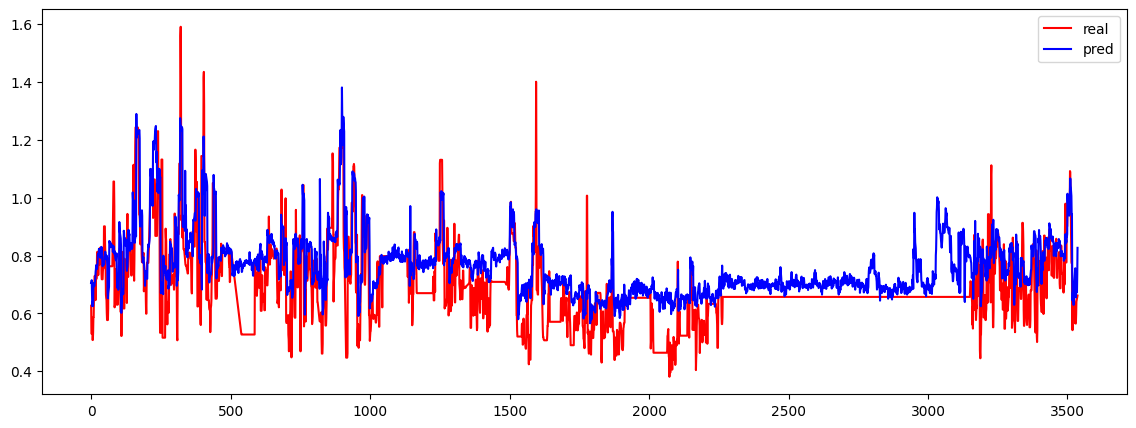

In [105]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [106]:

model = si_normal_rnn


In [107]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0


In [108]:

l_real[:20]


[0.6265333454586078,
 0.5299999526716427,
 0.5299999526716427,
 0.5299999526716427,
 0.5818666745741667,
 0.5080000281322947,
 0.5080000281322947,
 0.5343333667214429,
 0.587000002669182,
 0.587000002669182,
 0.6580000121427712,
 0.6580000121427712,
 0.7108000083286032,
 0.7300000275569118,
 0.7020000261436969,
 0.6460000233172668,
 0.6460000233172668,
 0.71506669072116,
 0.720000029997232,
 0.7201333696200467]

In [109]:

l_pred[:20]


[array([0.70507205], dtype=float32),
 array([0.73864543], dtype=float32),
 array([0.7615913], dtype=float32),
 array([0.7824906], dtype=float32),
 array([0.7970146], dtype=float32),
 array([0.8097124], dtype=float32),
 array([0.82035637], dtype=float32),
 array([0.8329781], dtype=float32),
 array([0.84844404], dtype=float32),
 array([0.8665607], dtype=float32),
 array([0.8862731], dtype=float32),
 array([0.906326], dtype=float32),
 array([0.9257934], dtype=float32),
 array([0.9443936], dtype=float32),
 array([0.96167374], dtype=float32),
 array([0.97729987], dtype=float32),
 array([0.99100995], dtype=float32),
 array([1.0022703], dtype=float32),
 array([1.010535], dtype=float32),
 array([1.0160825], dtype=float32)]

3537


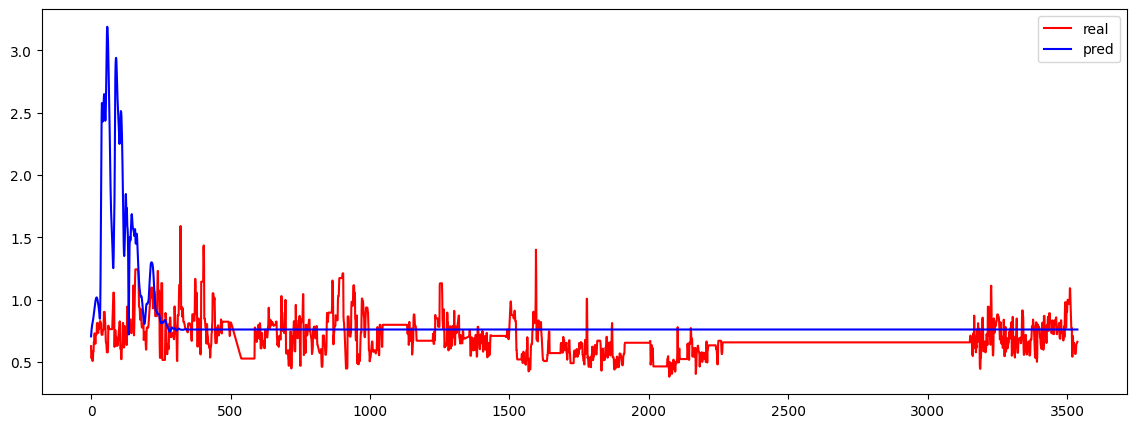

In [110]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins of lenght == 1 week

* input is 30 (about 7.5 hours)
* predicts rest of week


In [111]:

model = si_normal_rnn


In [112]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)




In [113]:

2826 / 220


12.845454545454546

torch.Size([220, 522])
torch.Size([220, 19])
0
220


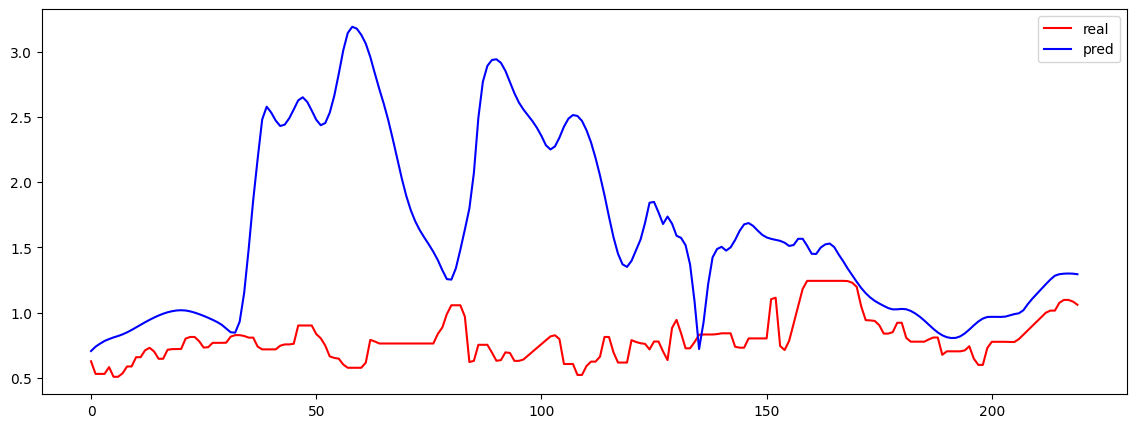

torch.Size([220, 522])
torch.Size([220, 19])
0
220


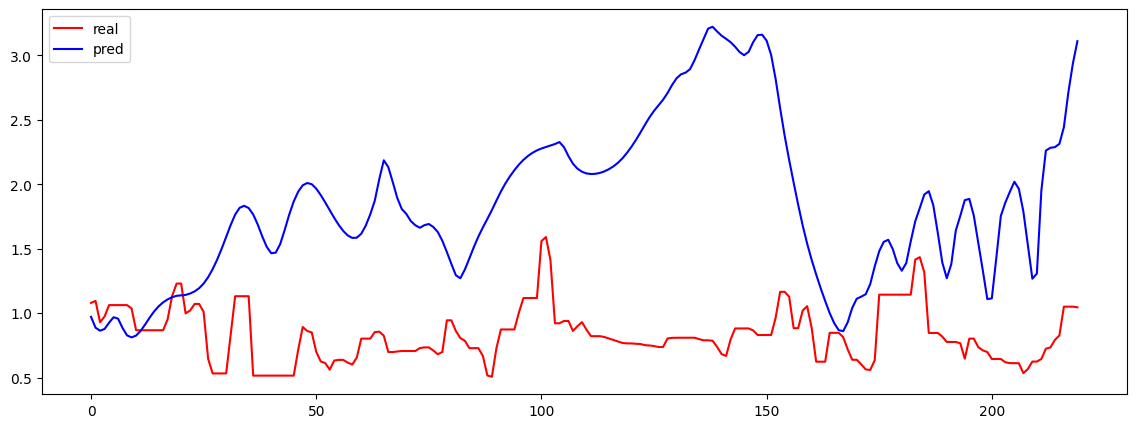

torch.Size([220, 522])
torch.Size([220, 19])
0
220


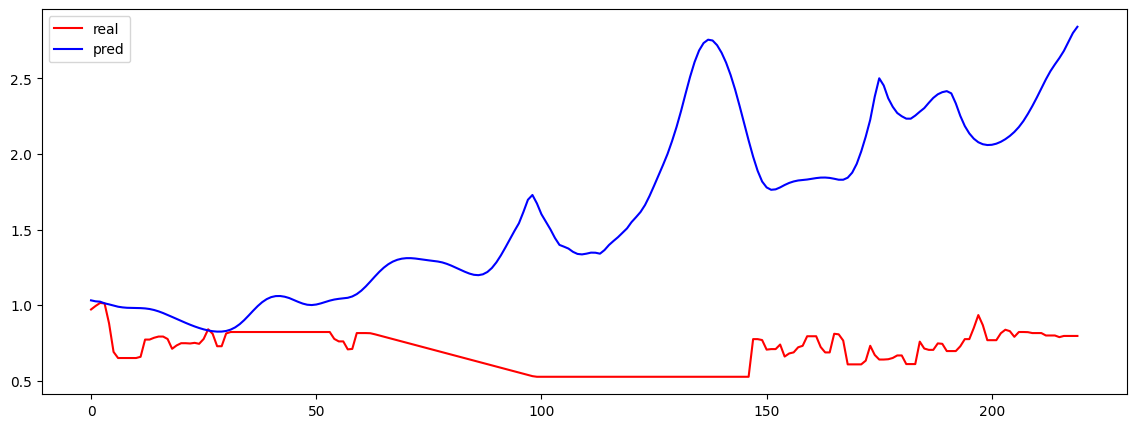

torch.Size([220, 522])
torch.Size([220, 19])
0
220


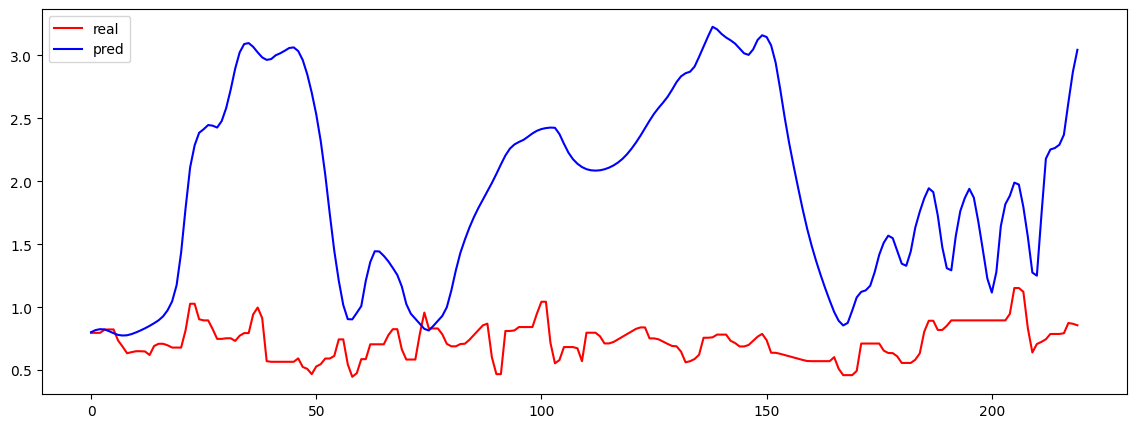

torch.Size([220, 522])
torch.Size([220, 19])
0
220


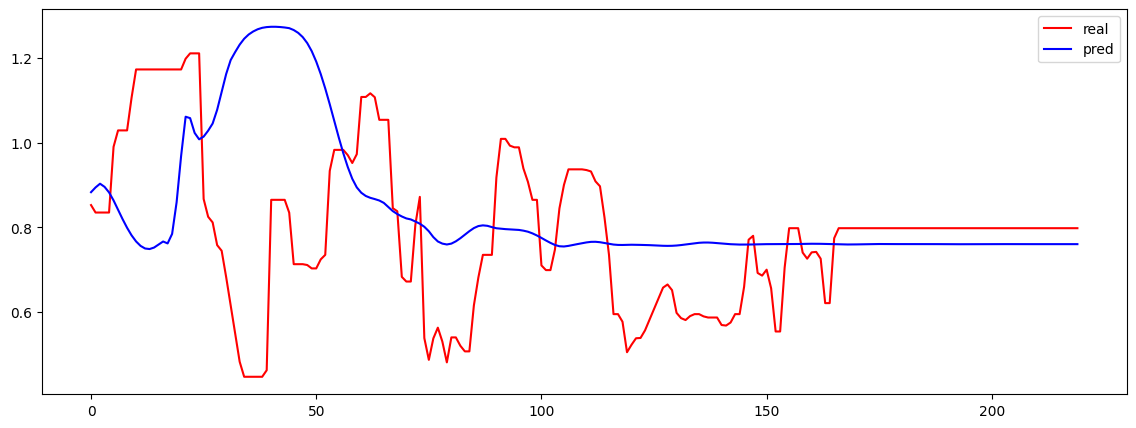

torch.Size([220, 522])
torch.Size([220, 19])
0
220


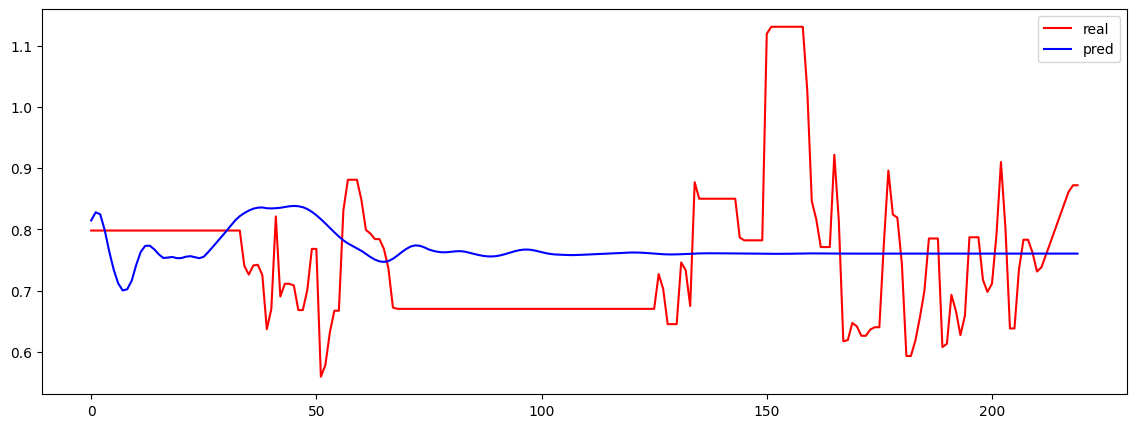

torch.Size([220, 522])
torch.Size([220, 19])
0
220


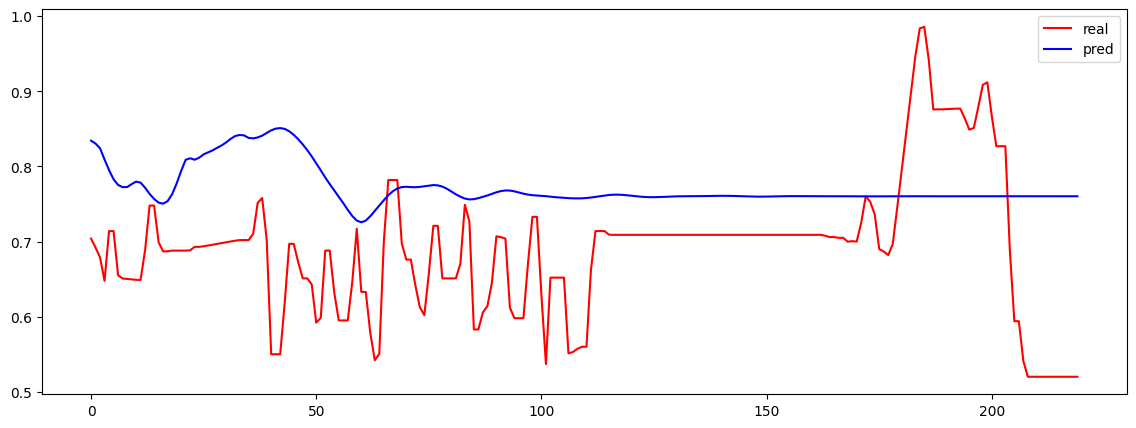

torch.Size([220, 522])
torch.Size([220, 19])
0
220


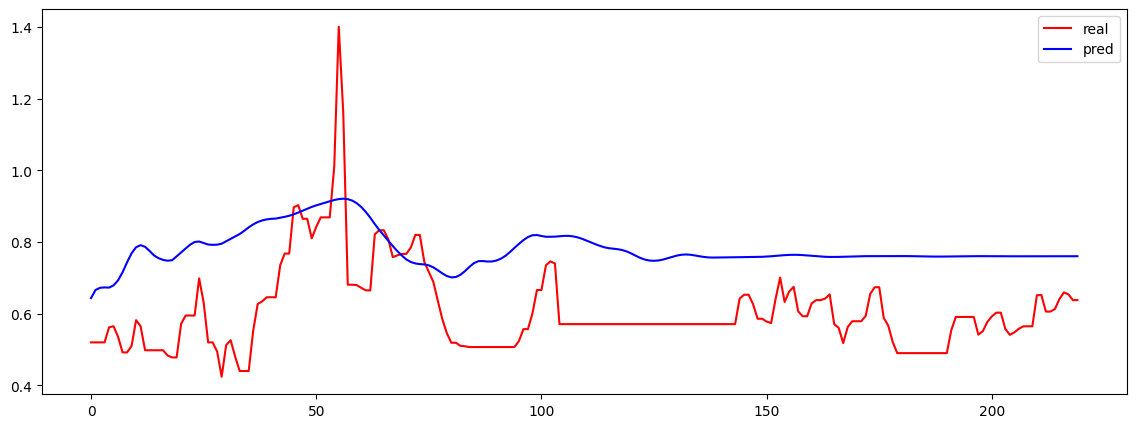

torch.Size([220, 522])
torch.Size([220, 19])
0
220


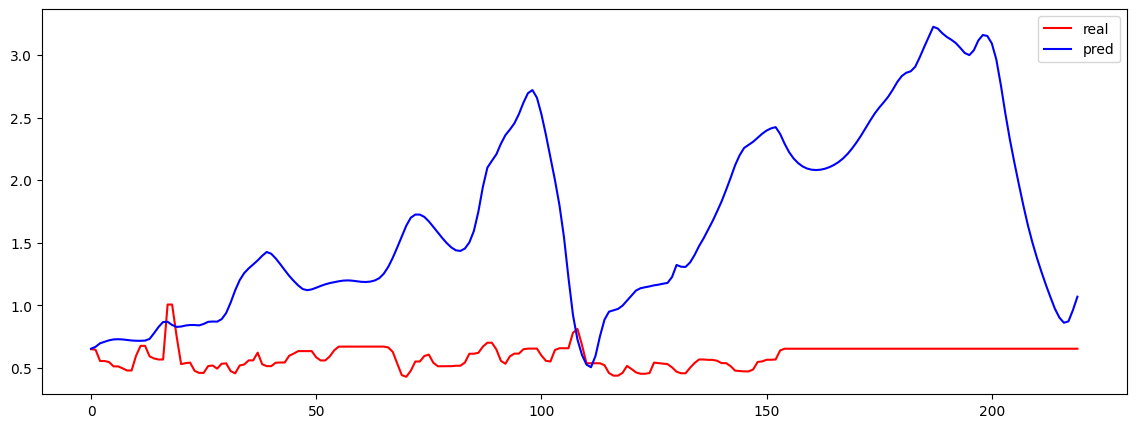

torch.Size([220, 522])
torch.Size([220, 19])
0
220


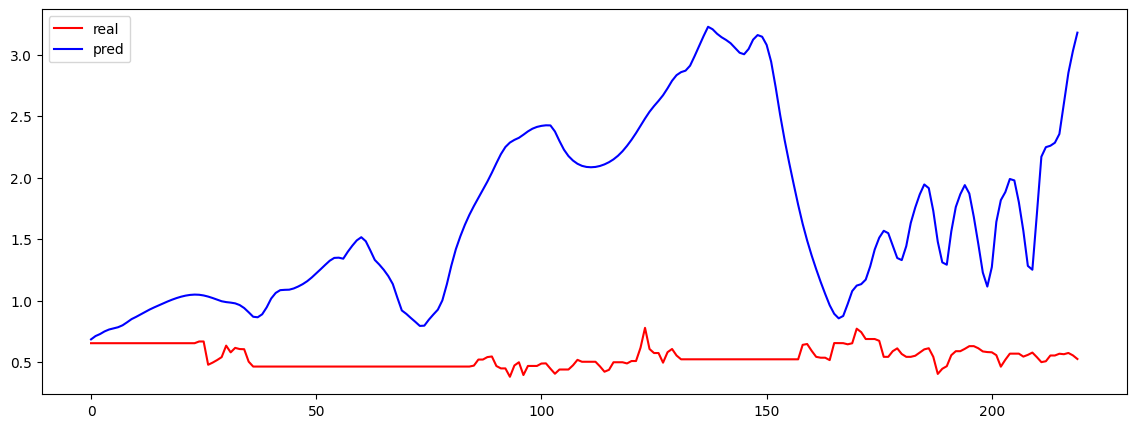

torch.Size([220, 522])
torch.Size([220, 19])
0
220


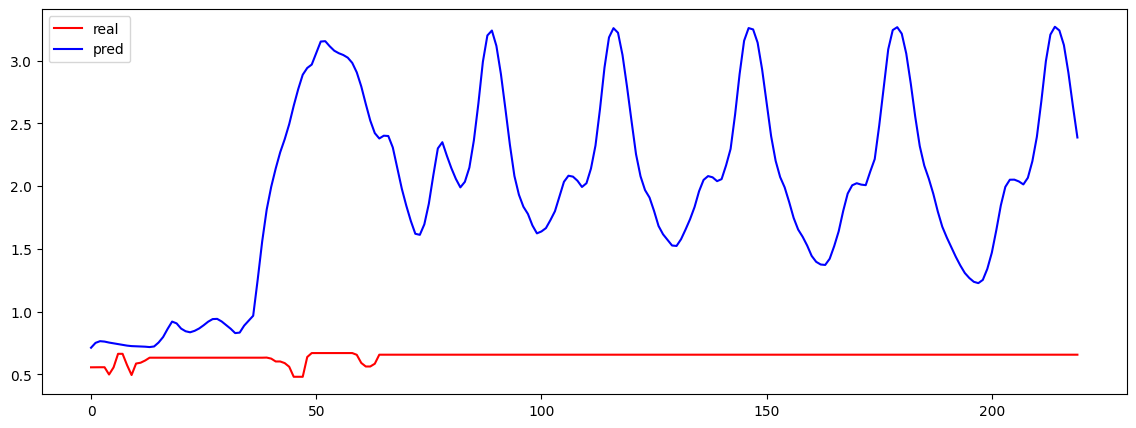

torch.Size([220, 522])
torch.Size([220, 19])
0
220


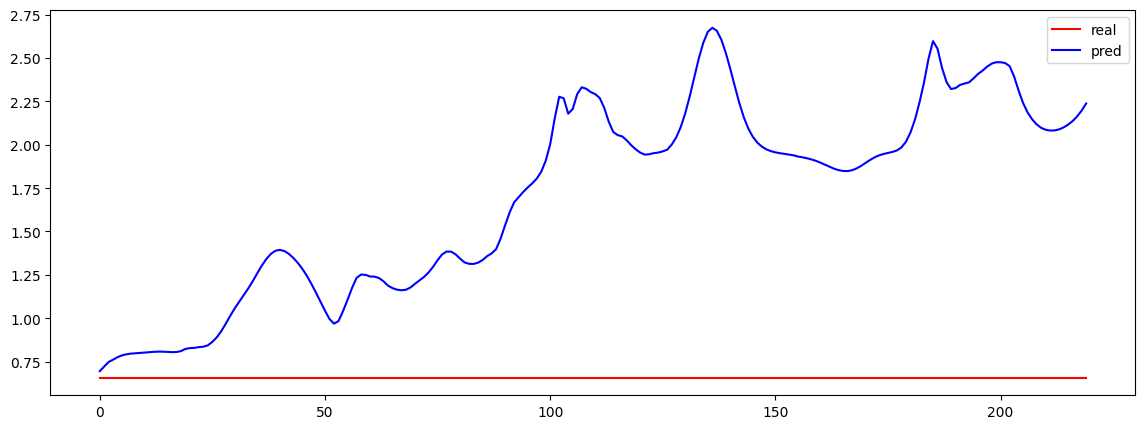

torch.Size([220, 522])
torch.Size([220, 19])
0
220


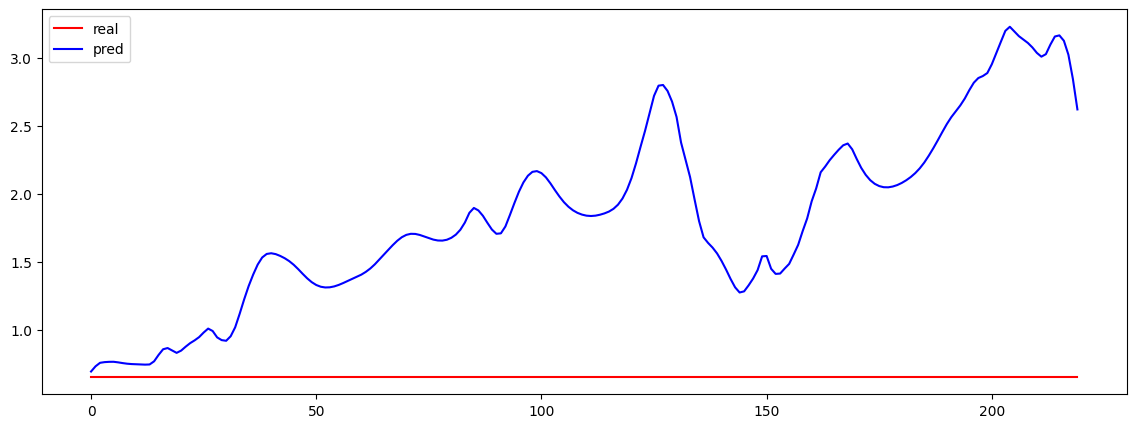

torch.Size([220, 522])
torch.Size([220, 19])
0
220


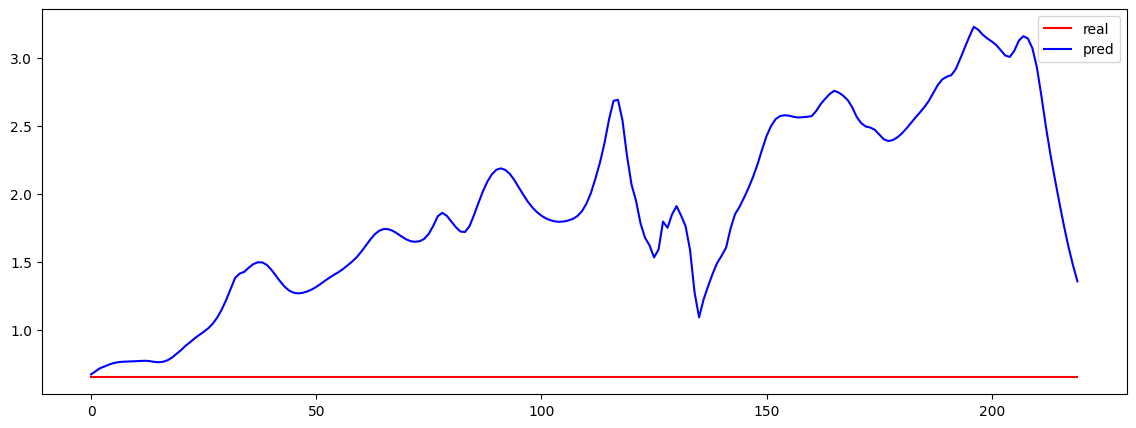

torch.Size([220, 522])
torch.Size([220, 19])
0
220


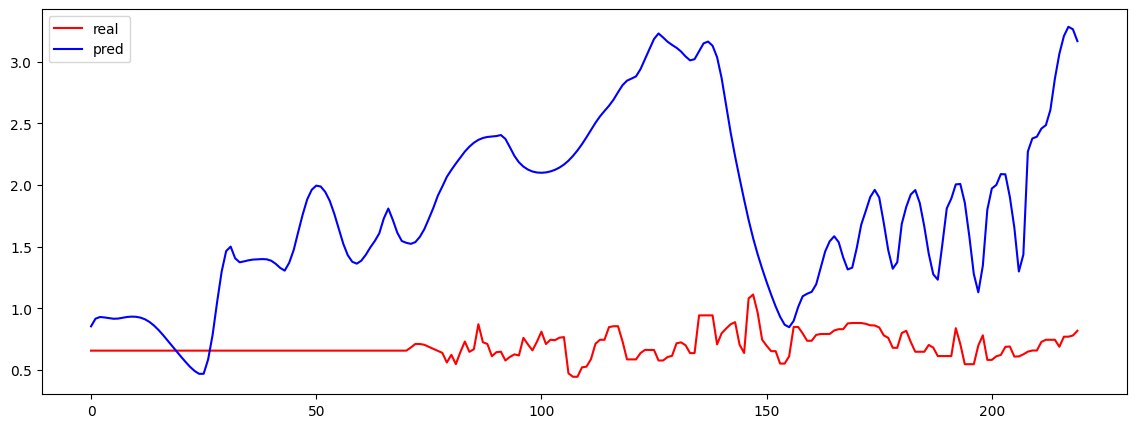

torch.Size([220, 522])
torch.Size([220, 19])
0
220


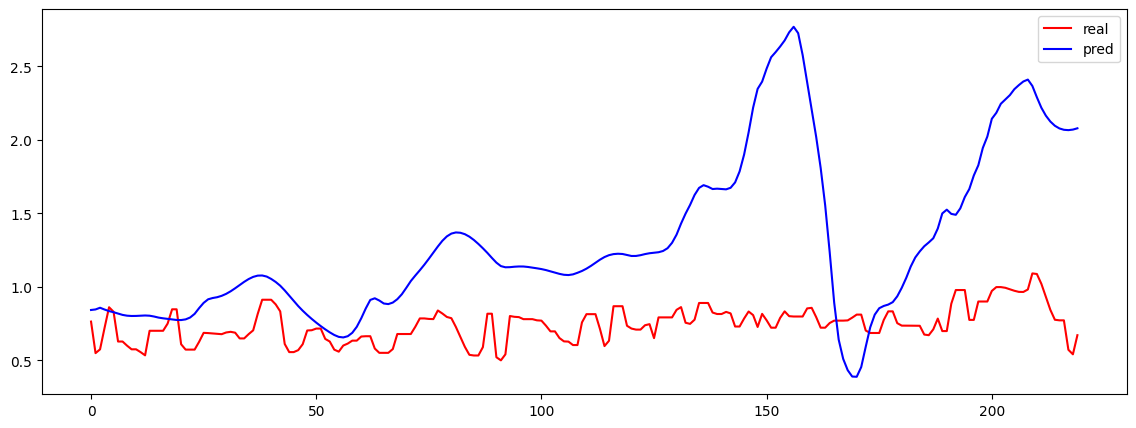

In [114]:

for i in range(0, y_test.shape[0]-220, 220):
    batch_x_test = x_test[i:i+220, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+220, :]
    print( batch_y_test.shape )

    bins_inference_model_pt(model, batch_x_test, batch_y_test)




## LSTM


In [115]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        # reshape
        ## lstm_o = lstm_o.view( -1, self.hidden_dim)
        
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/500 - Loss:  1.0199567079544067, val_loss: 0.978531002998352
25/500 - Loss:  0.24977703392505646, val_loss: 0.30789071321487427
50/500 - Loss:  0.1604851633310318, val_loss: 0.22834224998950958
75/500 - Loss:  0.13302110135555267, val_loss: 0.19952815771102905
100/500 - Loss:  0.1198287159204483, val_loss: 0.18220998346805573
125/500 - Loss:  0.11507245153188705, val_loss: 0.17019733786582947
150/500 - Loss:  0.10532838851213455, val_loss: 0.15987470746040344
175/500 - Loss:  0.10078136622905731, val_loss: 0.15144552290439606
200/500 - Loss:  0.10106907784938812, val_loss: 0.15079553425312042
225/500 - Loss:  0.09248430281877518, val_loss: 0.13879849016666412
250/500 - Loss:  0.08829808235168457, val_loss: 0.13066856563091278
275/500 - Loss:  0.08597273379564285, val_loss: 0.12703372538089752
300/500 - Loss:  0.08990591019392014, val_loss: 0.12451430410146713
325/500 - Loss:  0.0807947888970375, val_loss: 0.11637406796216965
350/500 - Loss:  0.07934477925300598, val_loss: 0.116966530

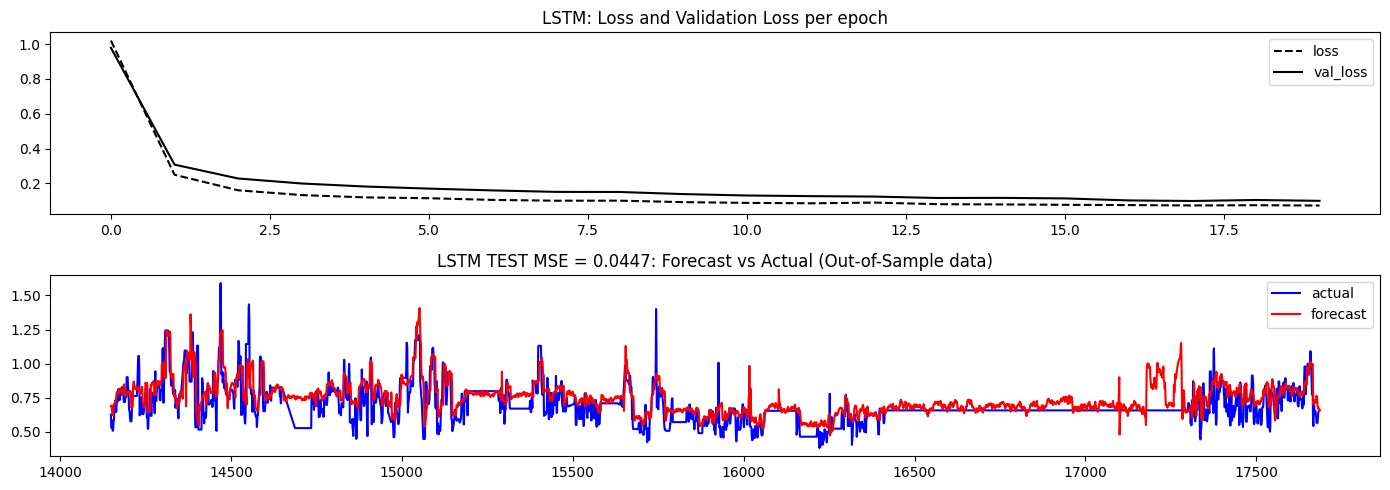

In [116]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM Inference



## Inference sanity check first


In [117]:

model = si_lstm


In [118]:

l_real, l_pred = inference_model_pt_2(model, model_type='LSTM', **params_si)


0


In [119]:

l_real[:20]


[0.6265333454586078,
 0.5299999526716427,
 0.5299999526716427,
 0.5299999526716427,
 0.5818666745741667,
 0.5080000281322947,
 0.5080000281322947,
 0.5343333667214429,
 0.587000002669182,
 0.587000002669182,
 0.6580000121427712,
 0.6580000121427712,
 0.7108000083286032,
 0.7300000275569118,
 0.7020000261436969,
 0.6460000233172668,
 0.6460000233172668,
 0.71506669072116,
 0.720000029997232,
 0.7201333696200467]

In [120]:

l_pred[:20]


[array([0.6895031], dtype=float32),
 array([0.6927705], dtype=float32),
 array([0.6892097], dtype=float32),
 array([0.6674588], dtype=float32),
 array([0.63664156], dtype=float32),
 array([0.6209719], dtype=float32),
 array([0.6341913], dtype=float32),
 array([0.6456387], dtype=float32),
 array([0.6991327], dtype=float32),
 array([0.7023671], dtype=float32),
 array([0.70046103], dtype=float32),
 array([0.6975082], dtype=float32),
 array([0.7200208], dtype=float32),
 array([0.71905243], dtype=float32),
 array([0.71684253], dtype=float32),
 array([0.74167097], dtype=float32),
 array([0.77420986], dtype=float32),
 array([0.7909288], dtype=float32),
 array([0.79203725], dtype=float32),
 array([0.7825918], dtype=float32)]

3537


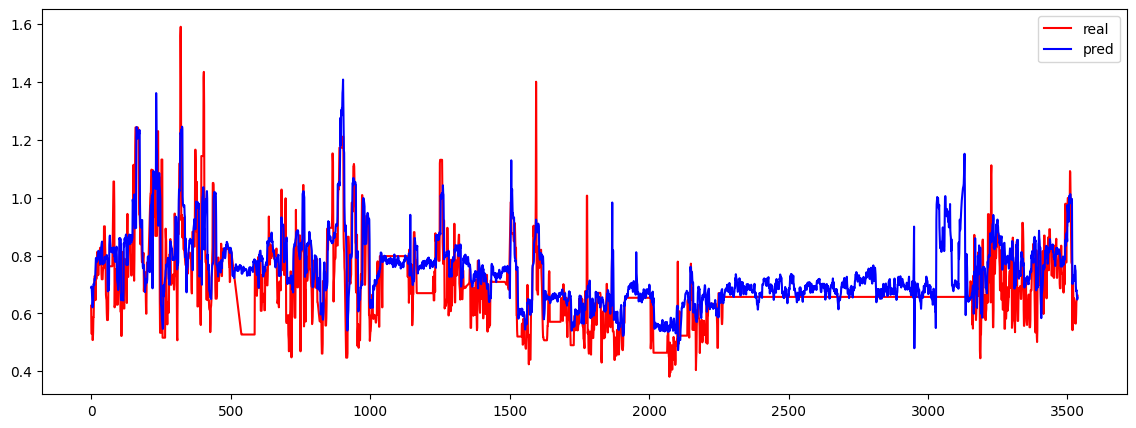

In [121]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [122]:

model = si_lstm


In [123]:

l_real, l_pred = inference_model_pt(model, model_type='LSTM', **params_si)


0


In [124]:

l_real[:50]


[0.6265333454586078,
 0.5299999526716427,
 0.5299999526716427,
 0.5299999526716427,
 0.5818666745741667,
 0.5080000281322947,
 0.5080000281322947,
 0.5343333667214429,
 0.587000002669182,
 0.587000002669182,
 0.6580000121427712,
 0.6580000121427712,
 0.7108000083286032,
 0.7300000275569118,
 0.7020000261436969,
 0.6460000233172668,
 0.6460000233172668,
 0.71506669072116,
 0.720000029997232,
 0.7201333696200467,
 0.7210000153225049,
 0.8007333577848721,
 0.8130000258560055,
 0.8130000258560055,
 0.7806000024274191,
 0.7319999982074576,
 0.7343999877264471,
 0.7680000059145281,
 0.7680000059145281,
 0.7681999947334712,
 0.7689999912398009,
 0.8154000153749948,
 0.827000026562613,
 0.827000026562613,
 0.8206666830928244,
 0.8080000373838049,
 0.8080000373838049,
 0.7389999985607614,
 0.7179999975008502,
 0.7179999975008502,
 0.7179999975008502,
 0.7179999975008502,
 0.7458666592912506,
 0.7559999758584663,
 0.7559999758584663,
 0.7608333104174274,
 0.901000022934939,
 0.901000022934939,
 

In [125]:

l_pred[:500]


[array([0.6895031], dtype=float32),
 array([0.6901231], dtype=float32),
 array([0.683522], dtype=float32),
 array([0.68416315], dtype=float32),
 array([0.693061], dtype=float32),
 array([0.710016], dtype=float32),
 array([0.7316457], dtype=float32),
 array([0.754488], dtype=float32),
 array([0.7766304], dtype=float32),
 array([0.7971693], dtype=float32),
 array([0.8158273], dtype=float32),
 array([0.83269304], dtype=float32),
 array([0.8480878], dtype=float32),
 array([0.8624832], dtype=float32),
 array([0.87646323], dtype=float32),
 array([0.89064527], dtype=float32),
 array([0.90554714], dtype=float32),
 array([0.9215015], dtype=float32),
 array([0.93866813], dtype=float32),
 array([0.95700794], dtype=float32),
 array([0.976301], dtype=float32),
 array([0.9962277], dtype=float32),
 array([1.0164063], dtype=float32),
 array([1.0364369], dtype=float32),
 array([1.0559542], dtype=float32),
 array([1.0746385], dtype=float32),
 array([1.0922488], dtype=float32),
 array([1.1086205], dtype=

3537


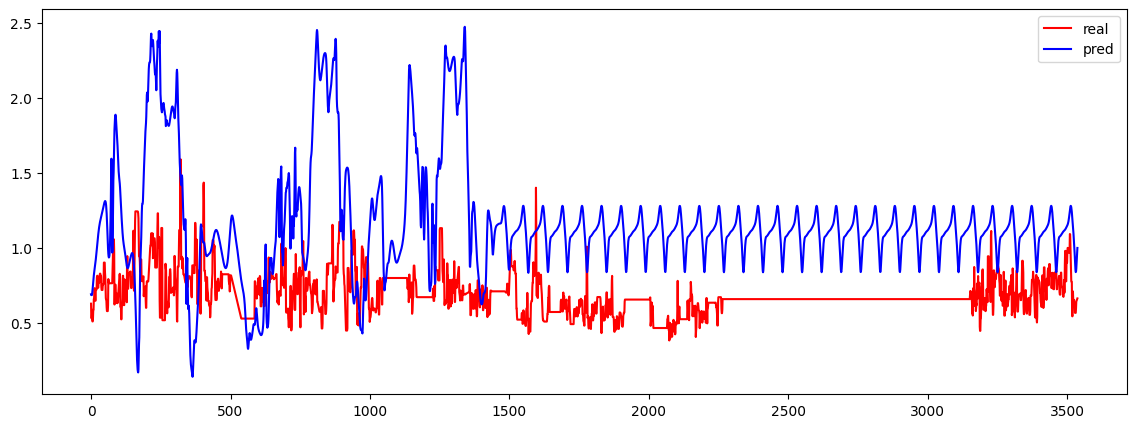

In [126]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins of lenght == 1 week

* input is 30 (about 7.5 hours)
* predicts rest of week


In [127]:

model = si_lstm


In [128]:


x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [129]:

2826 / 220


12.845454545454546

torch.Size([220, 522])
torch.Size([220, 19])
0
220


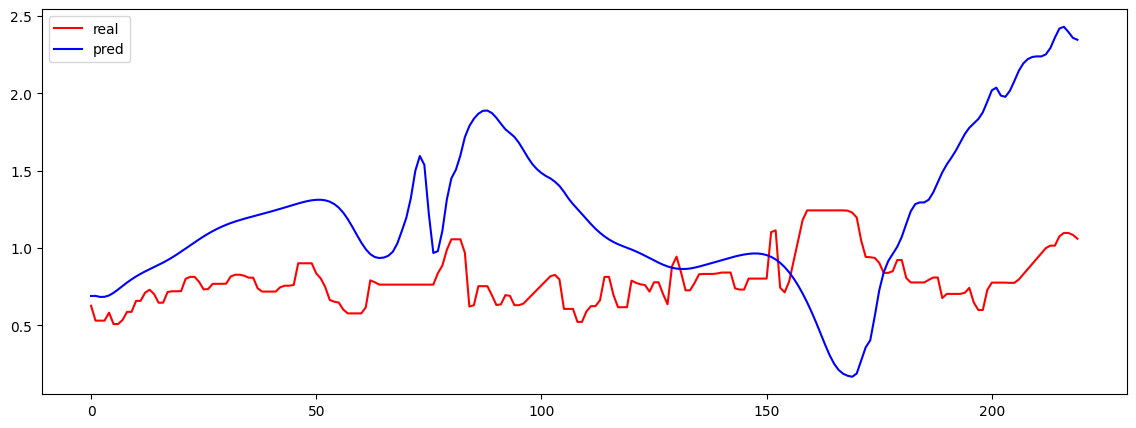

torch.Size([220, 522])
torch.Size([220, 19])
0
220


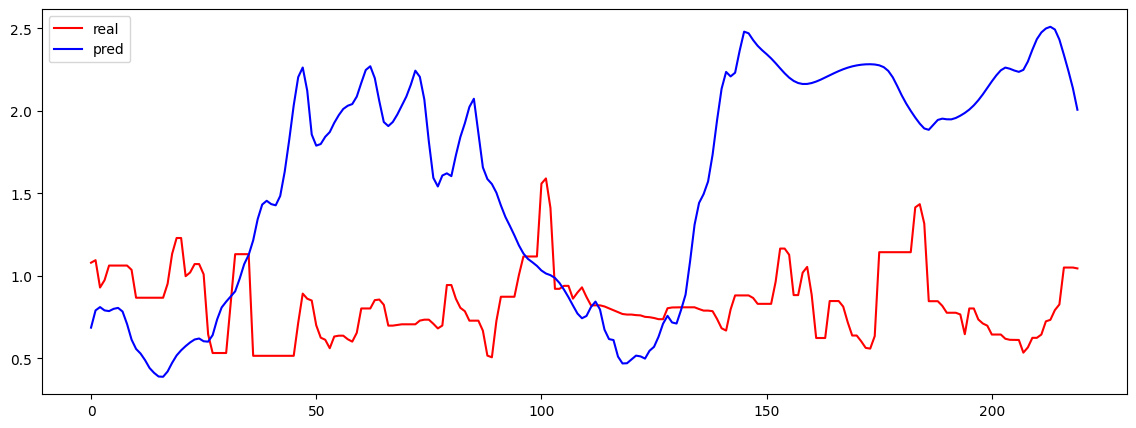

torch.Size([220, 522])
torch.Size([220, 19])
0
220


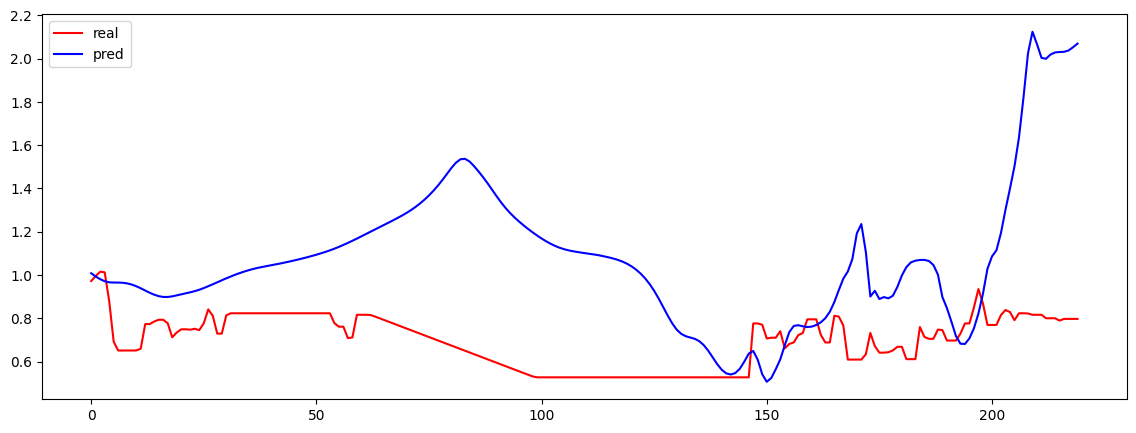

torch.Size([220, 522])
torch.Size([220, 19])
0
220


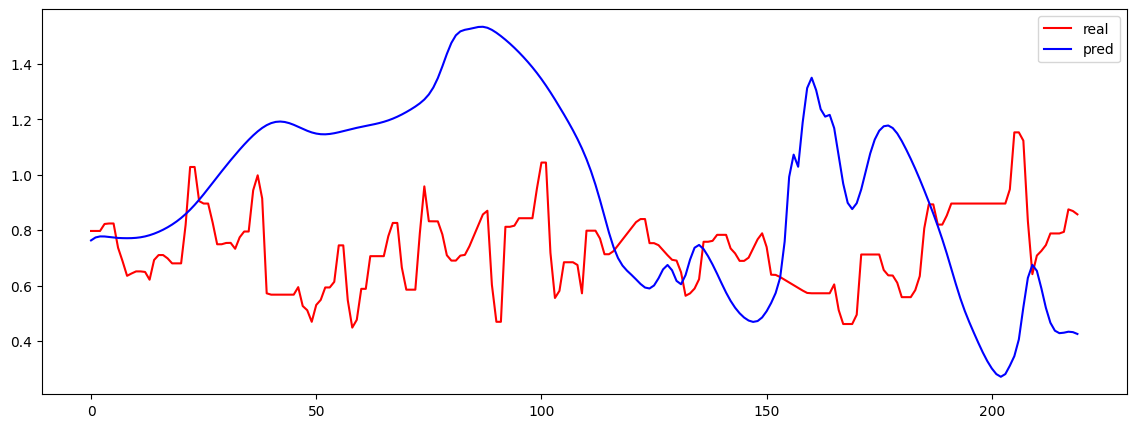

torch.Size([220, 522])
torch.Size([220, 19])
0
220


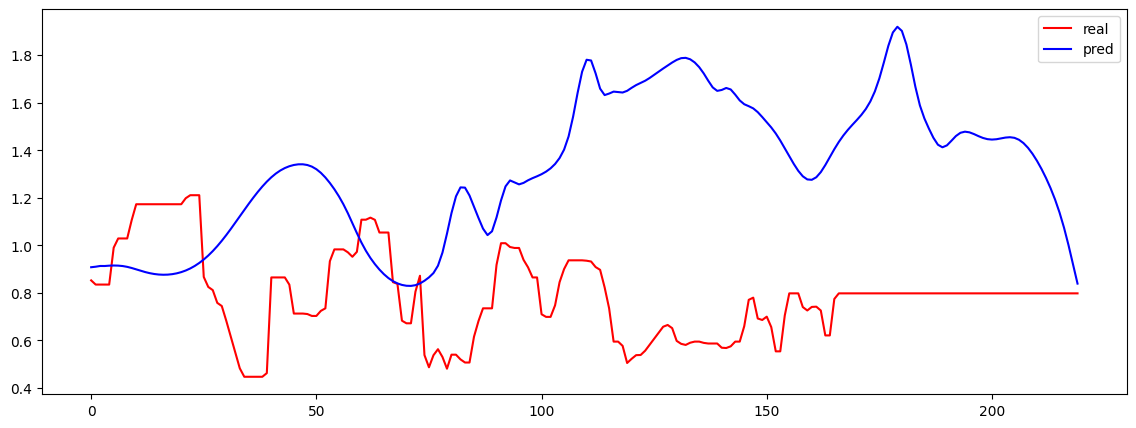

torch.Size([220, 522])
torch.Size([220, 19])
0
220


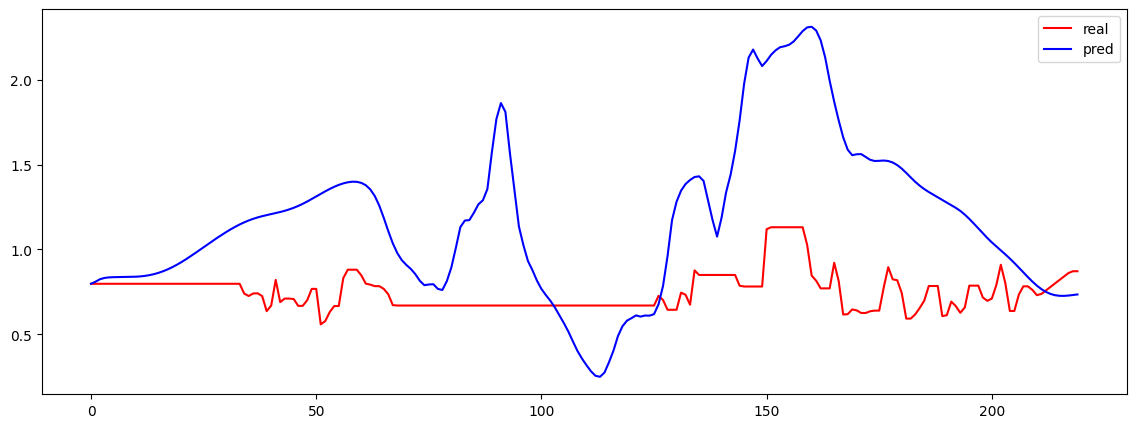

torch.Size([220, 522])
torch.Size([220, 19])
0
220


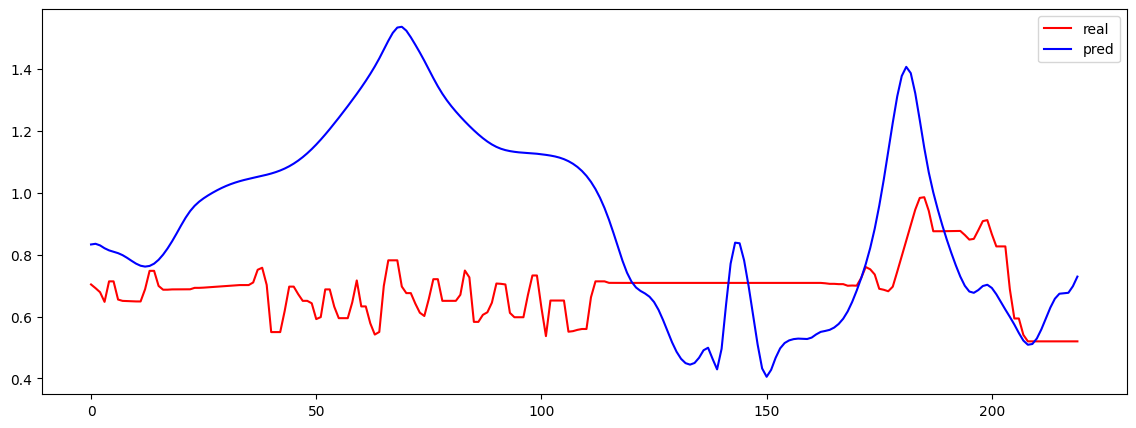

torch.Size([220, 522])
torch.Size([220, 19])
0
220


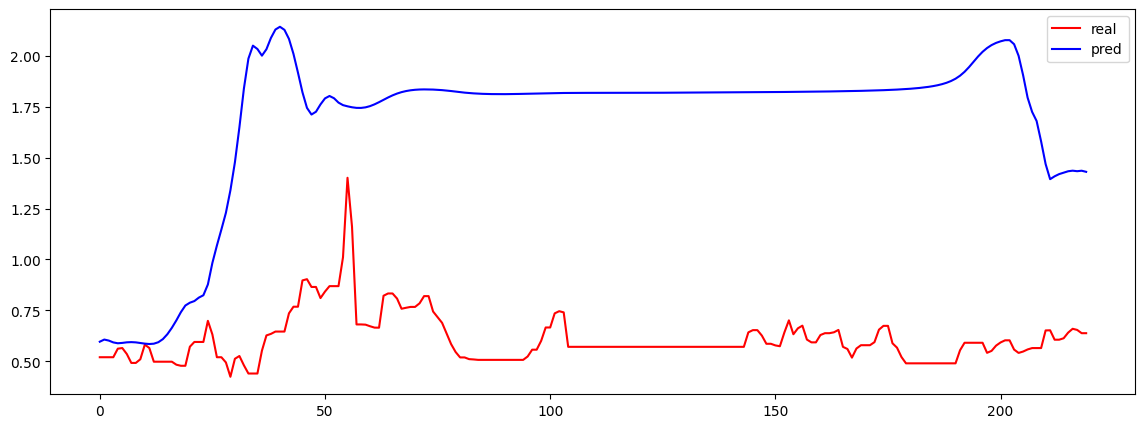

torch.Size([220, 522])
torch.Size([220, 19])
0
220


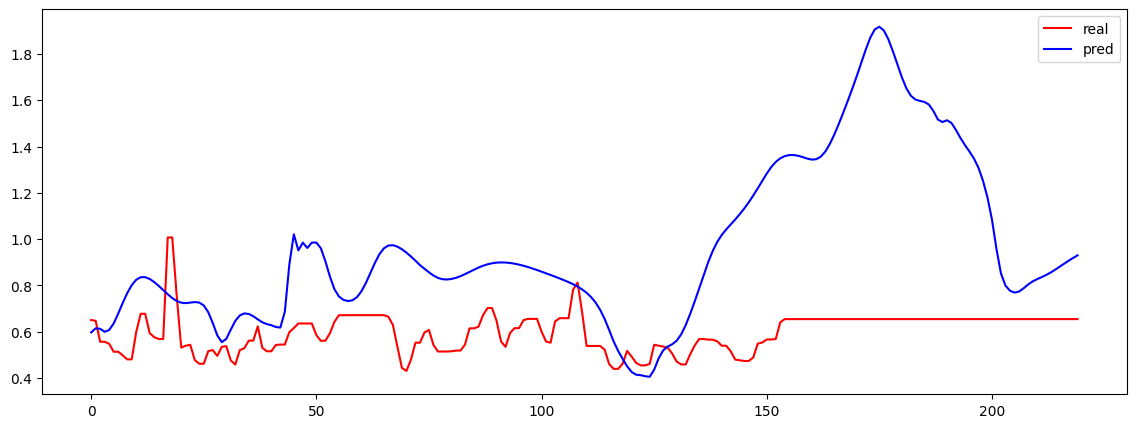

torch.Size([220, 522])
torch.Size([220, 19])
0
220


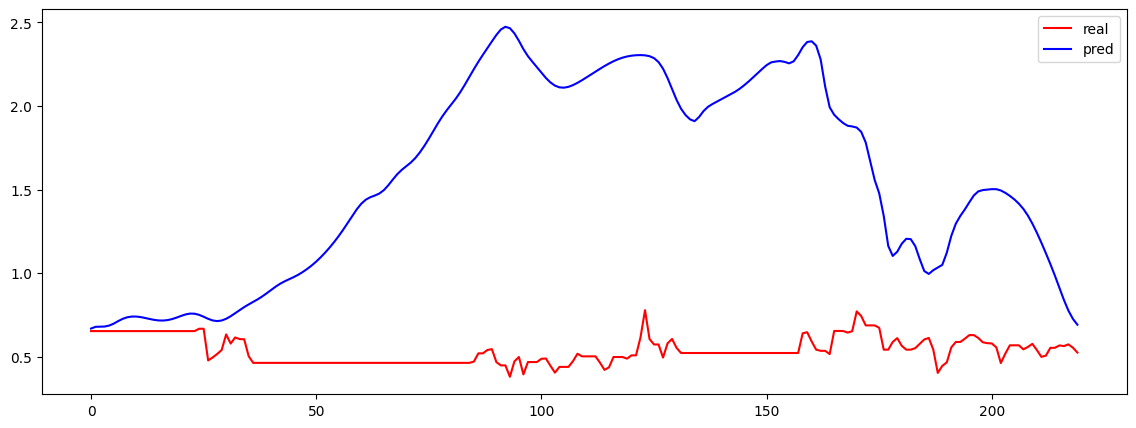

torch.Size([220, 522])
torch.Size([220, 19])
0
220


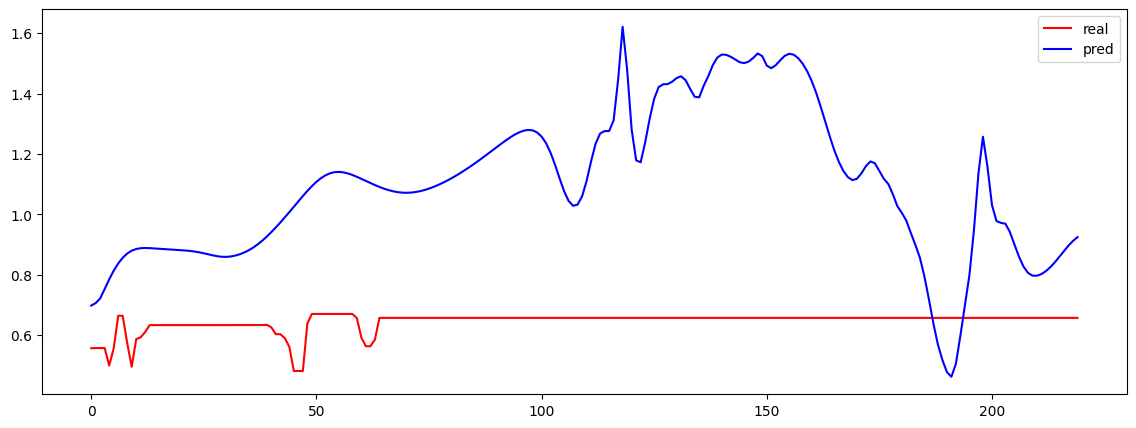

torch.Size([220, 522])
torch.Size([220, 19])
0
220


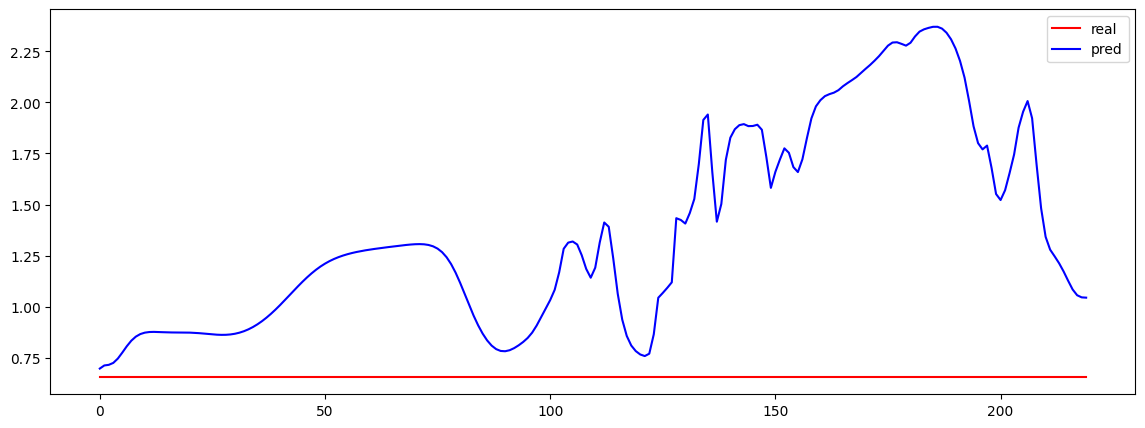

torch.Size([220, 522])
torch.Size([220, 19])
0
220


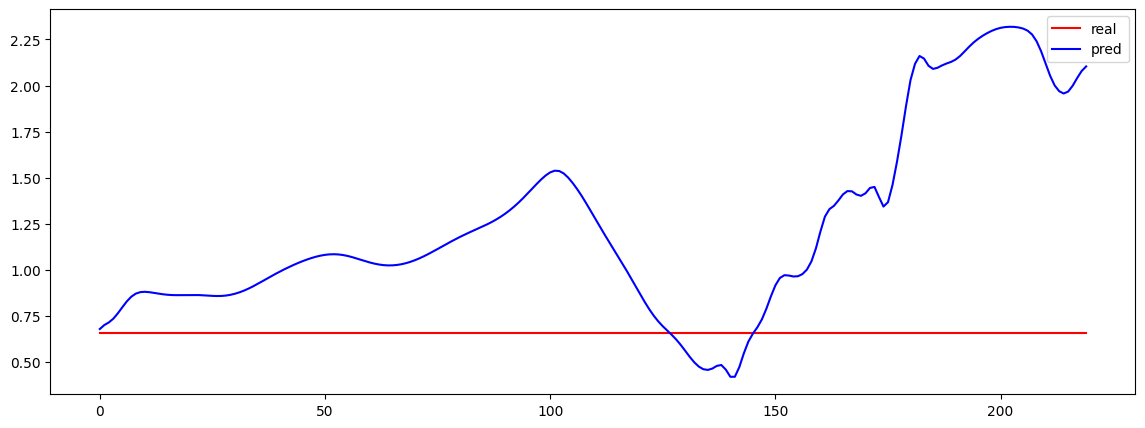

torch.Size([220, 522])
torch.Size([220, 19])
0
220


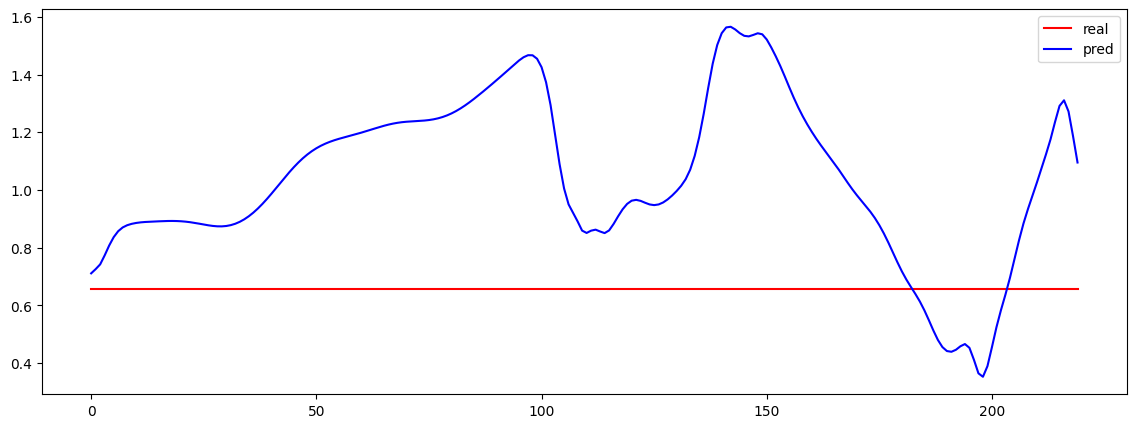

torch.Size([220, 522])
torch.Size([220, 19])
0
220


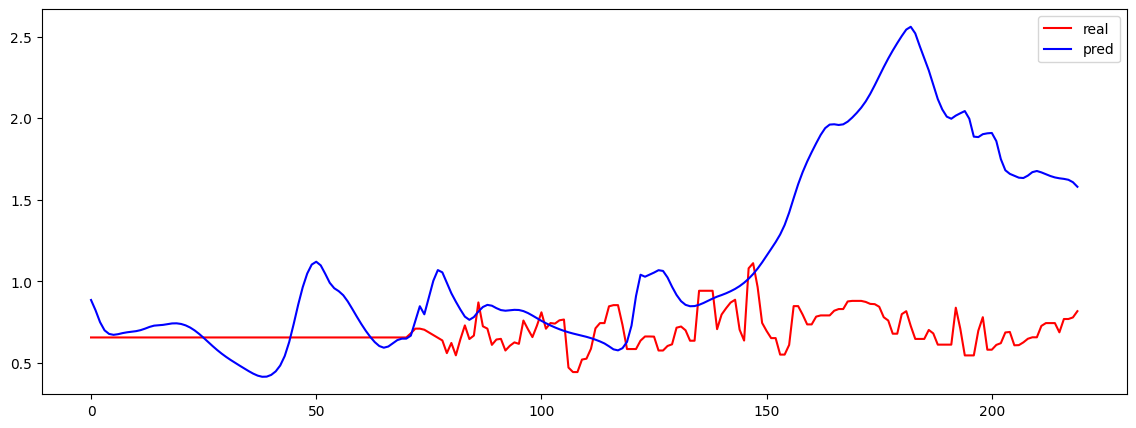

torch.Size([220, 522])
torch.Size([220, 19])
0
220


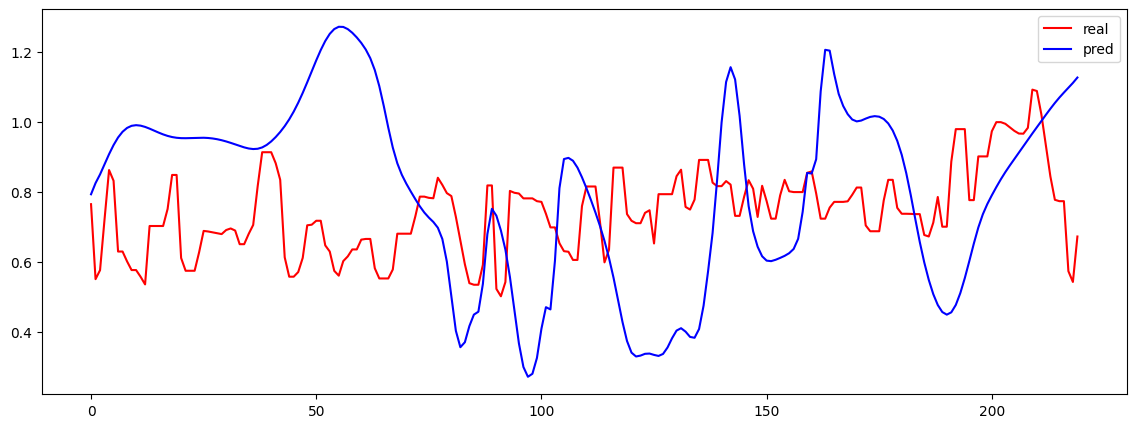

In [130]:

for i in range(0, y_test.shape[0]-220, 220):
    batch_x_test = x_test[i:i+220, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+220, :]
    print( batch_y_test.shape )

    bins_inference_model_pt(model, batch_x_test, batch_y_test)



## View all predicted Xs


In [131]:


            
            
def View_all_predicted_Xs(x_index, model, model_type='RNN', **kwargs):
 
    x_test, y_test   = kwargs['test_data']
 
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
 
    ## Plotting
    fig, ax = plt.subplots(2, 1) 
    
    ax[0].set_title(f"{model_type} TEST MSE = {0:.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, x_index]
    pred   =   pred[:, x_index]
    
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return 0, 0
    
           

            



ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


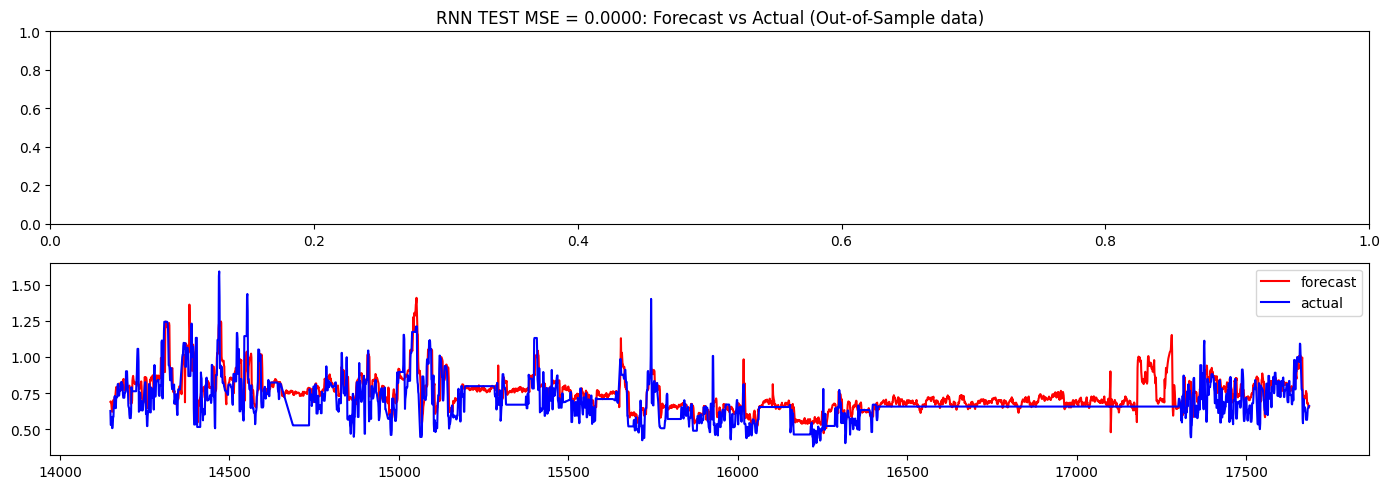

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


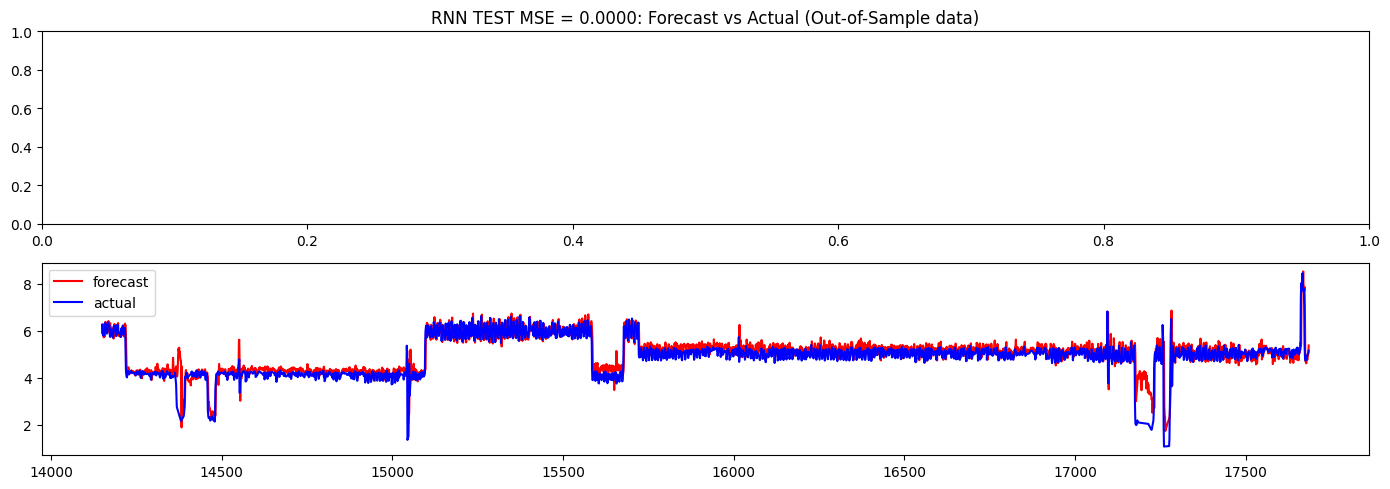

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


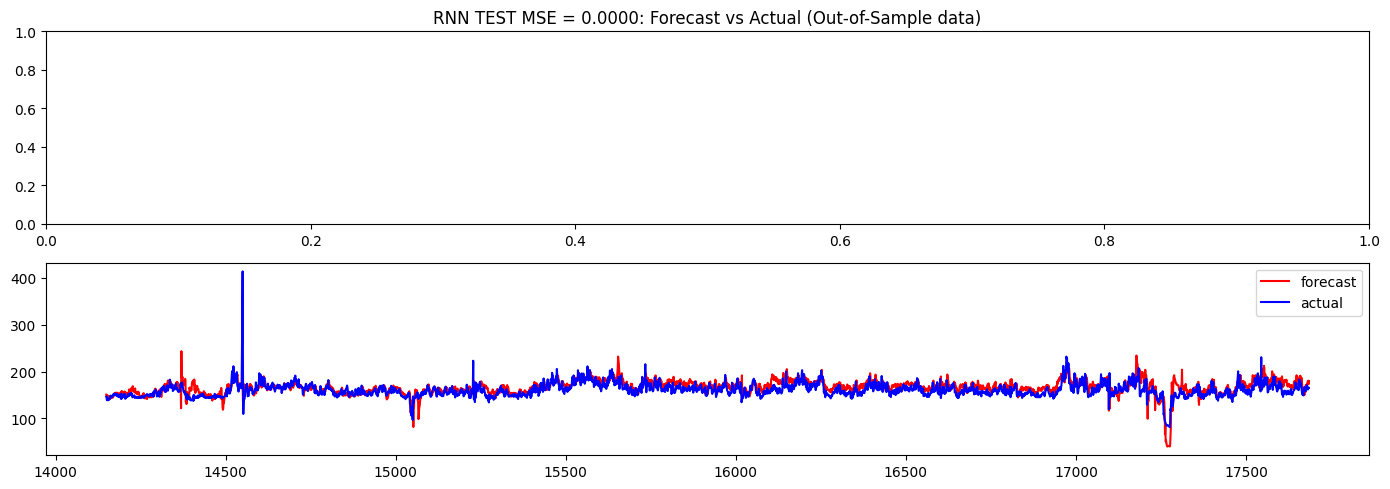

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


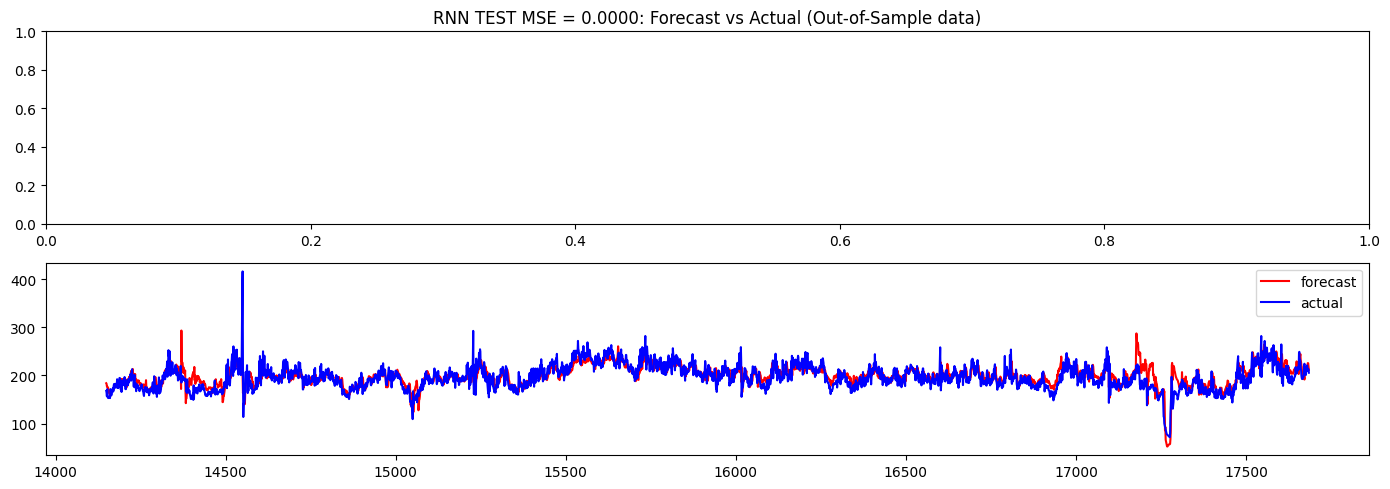

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


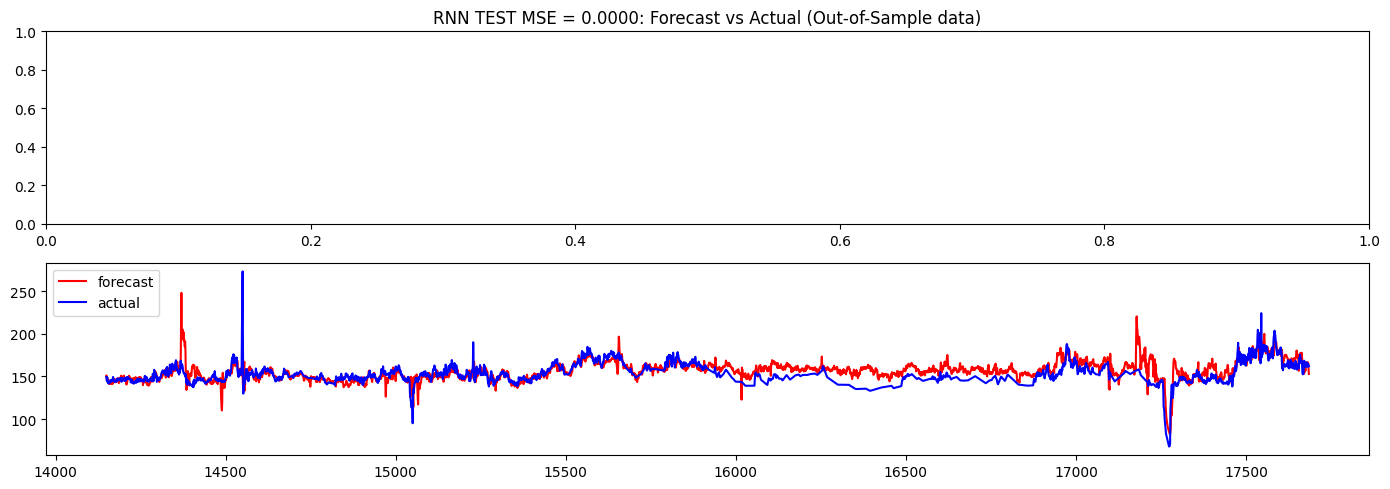

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


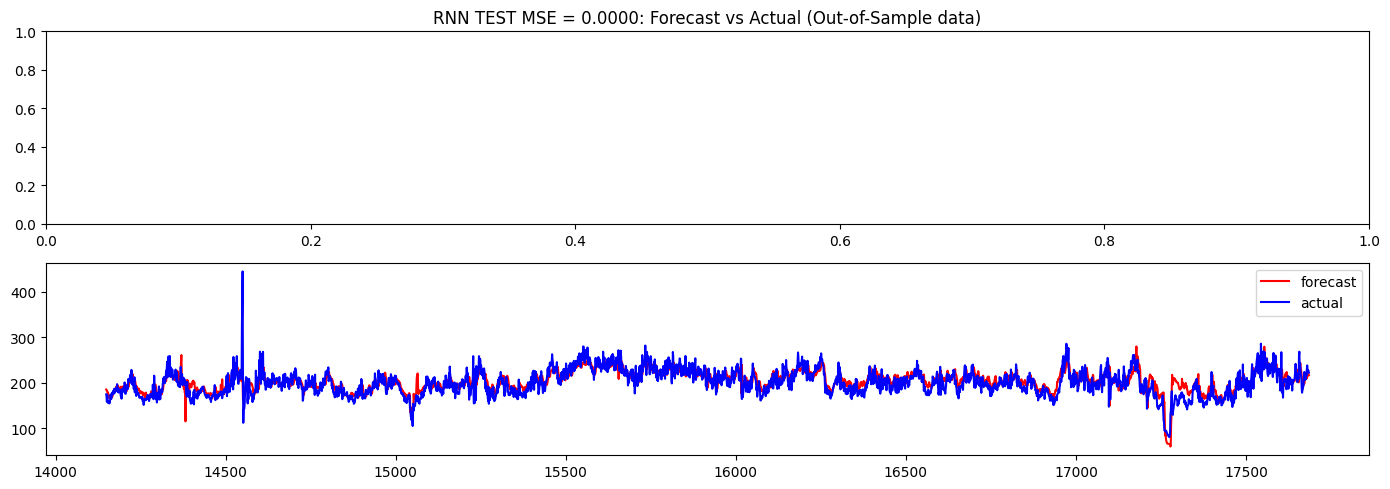

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


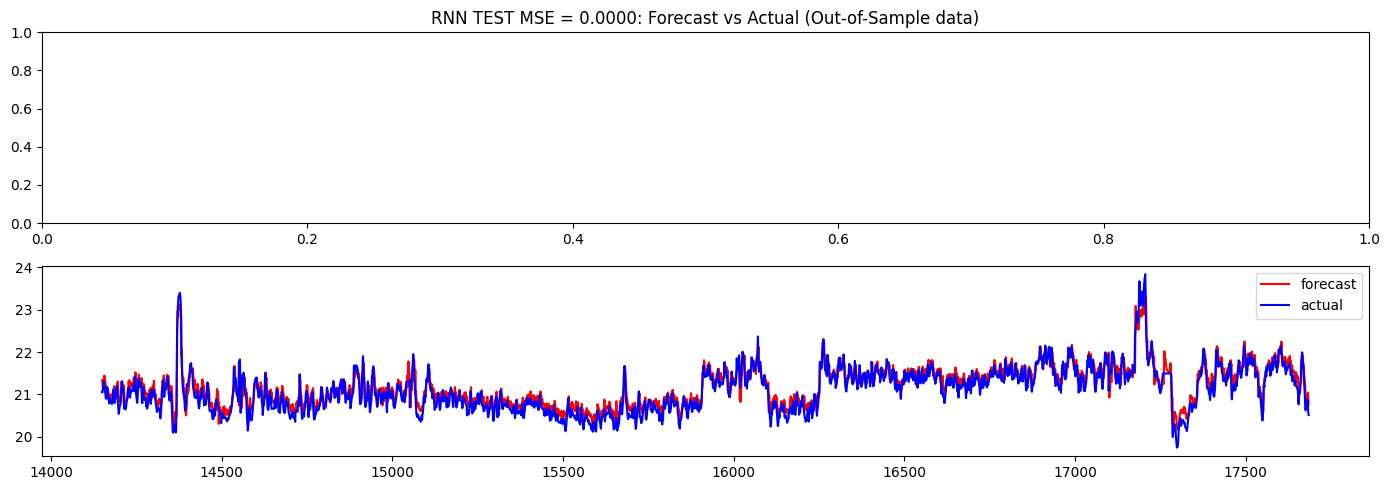

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


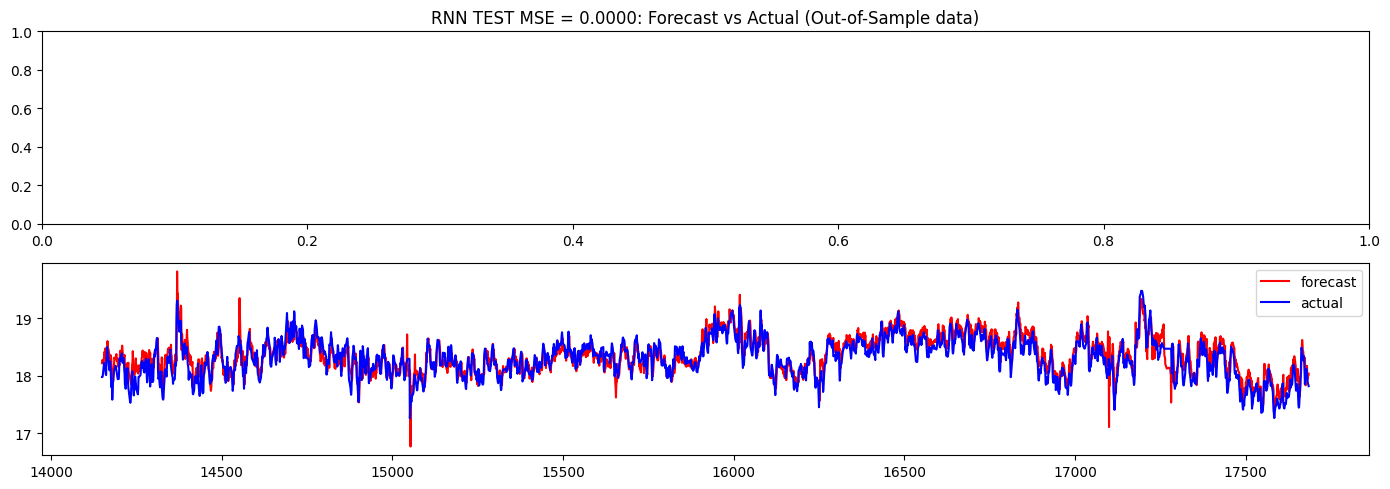

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


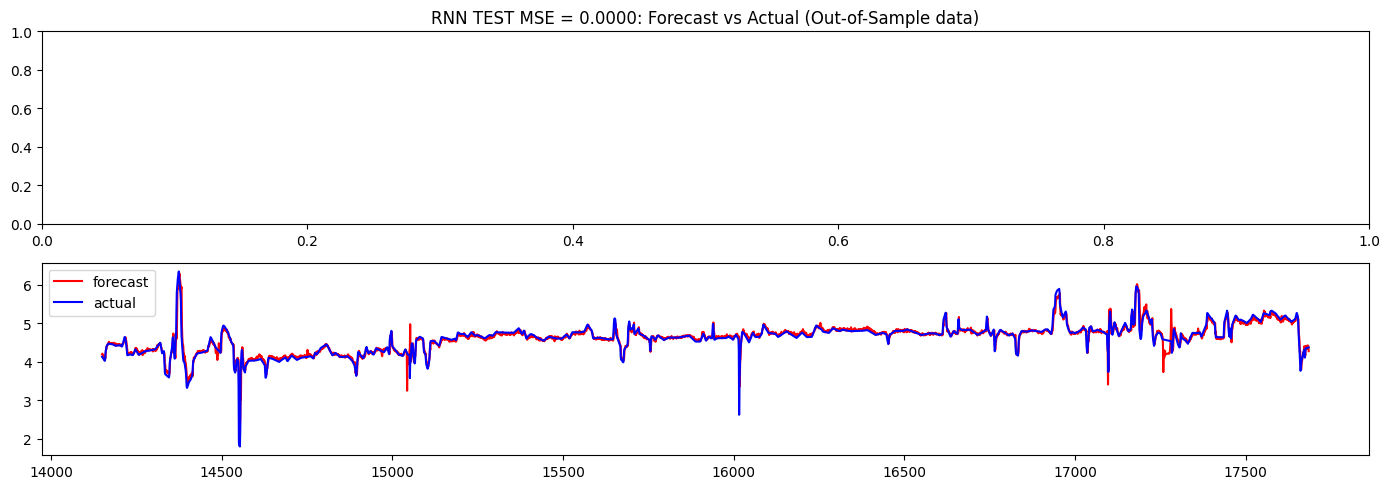

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


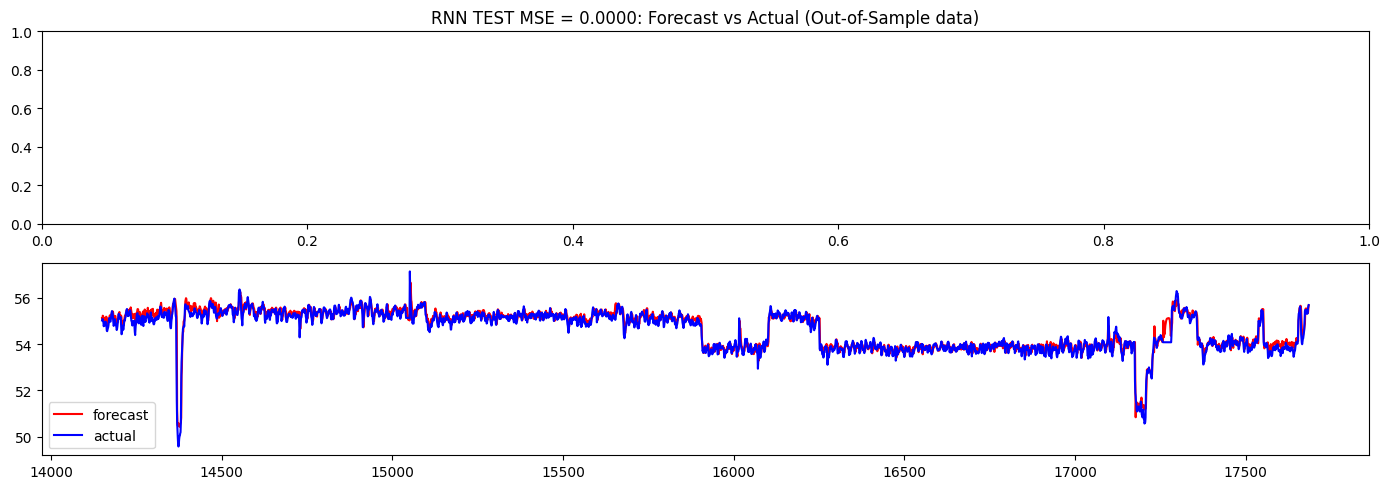

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


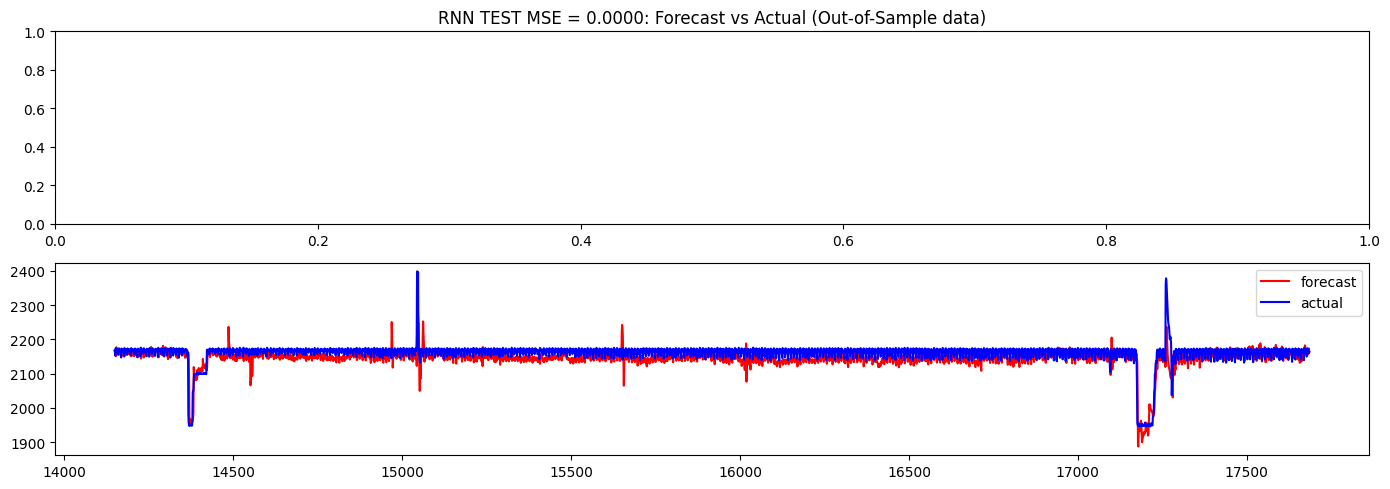

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


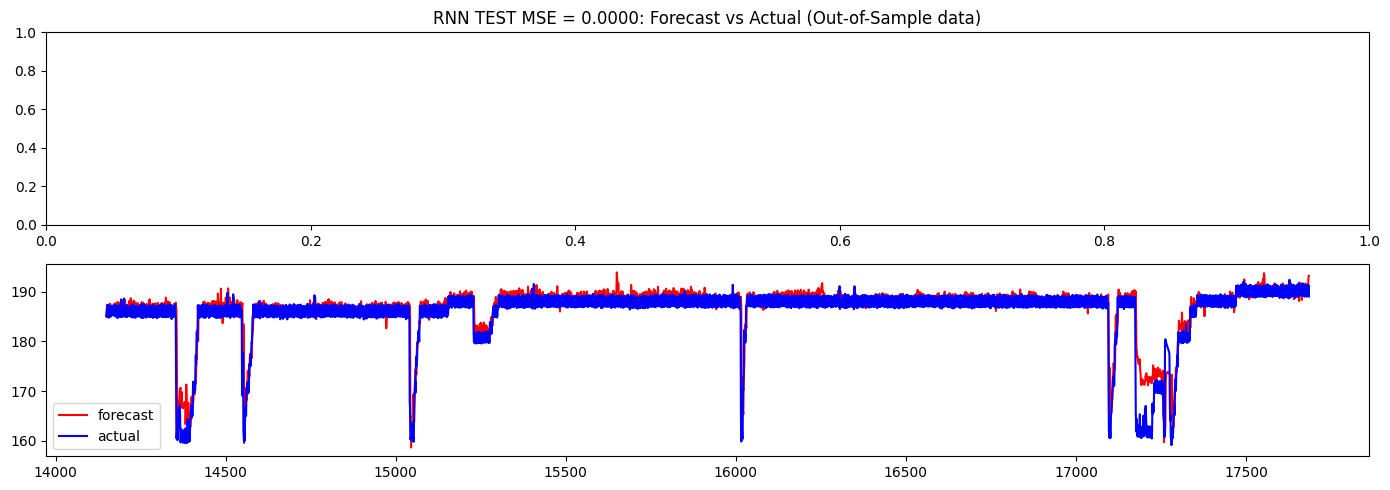

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


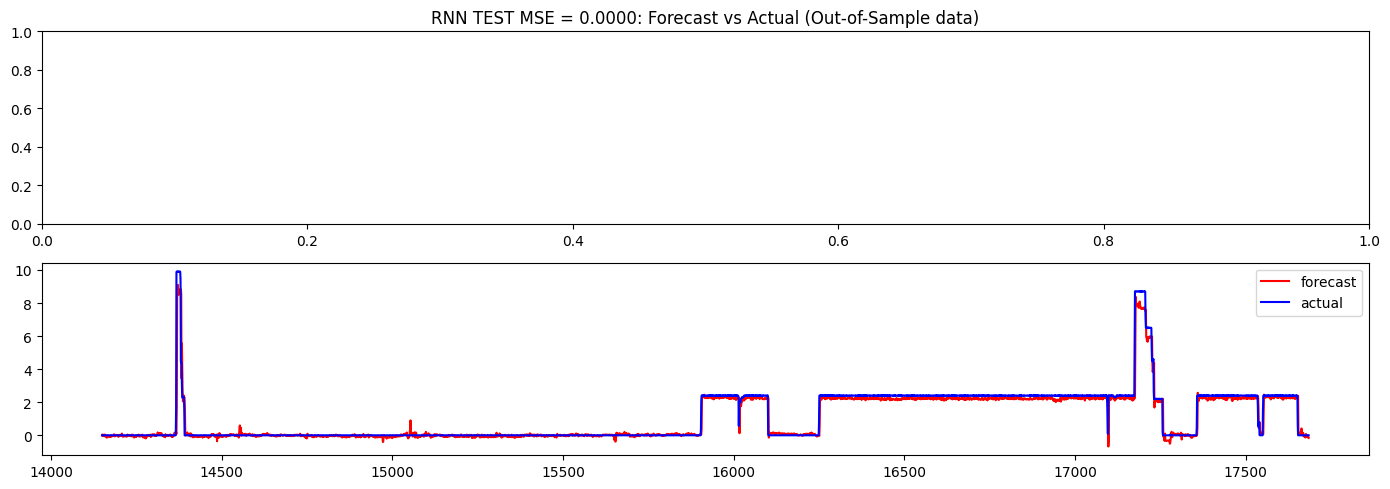

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


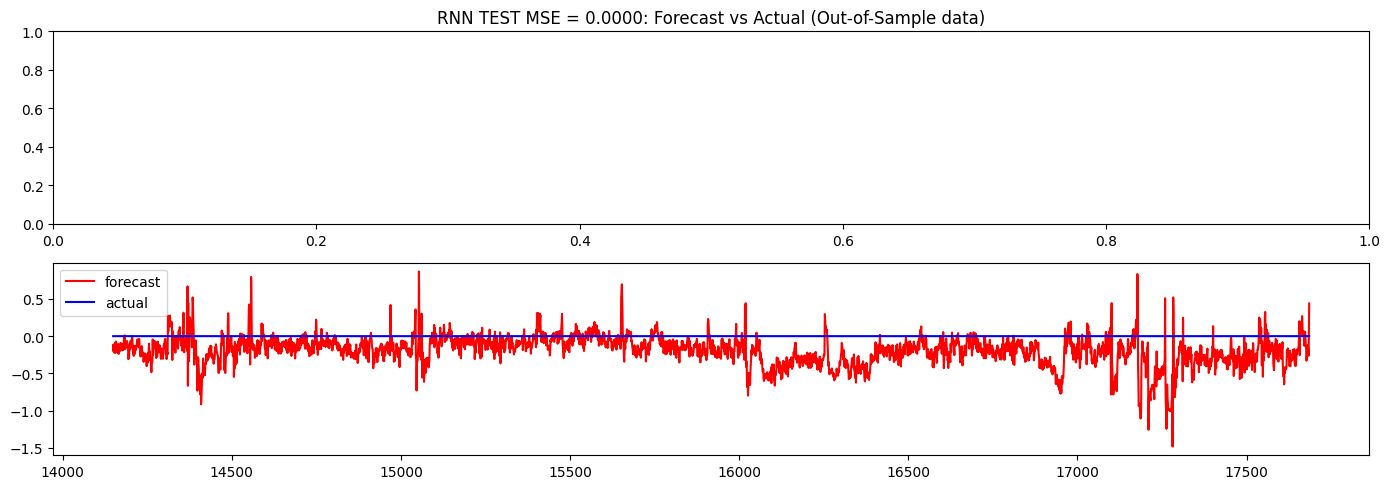

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


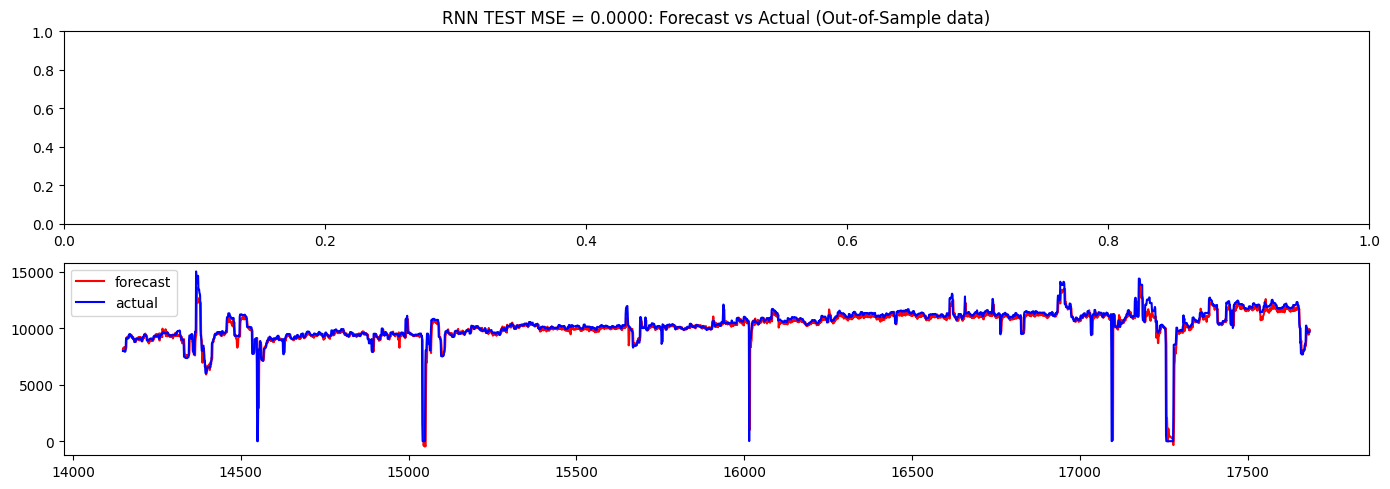

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


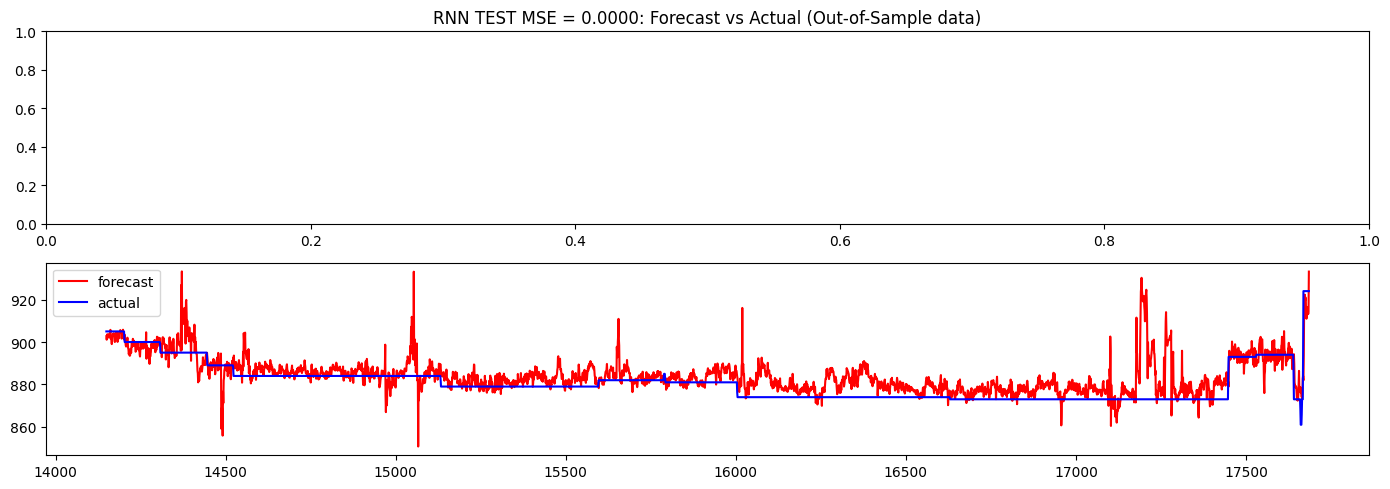

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


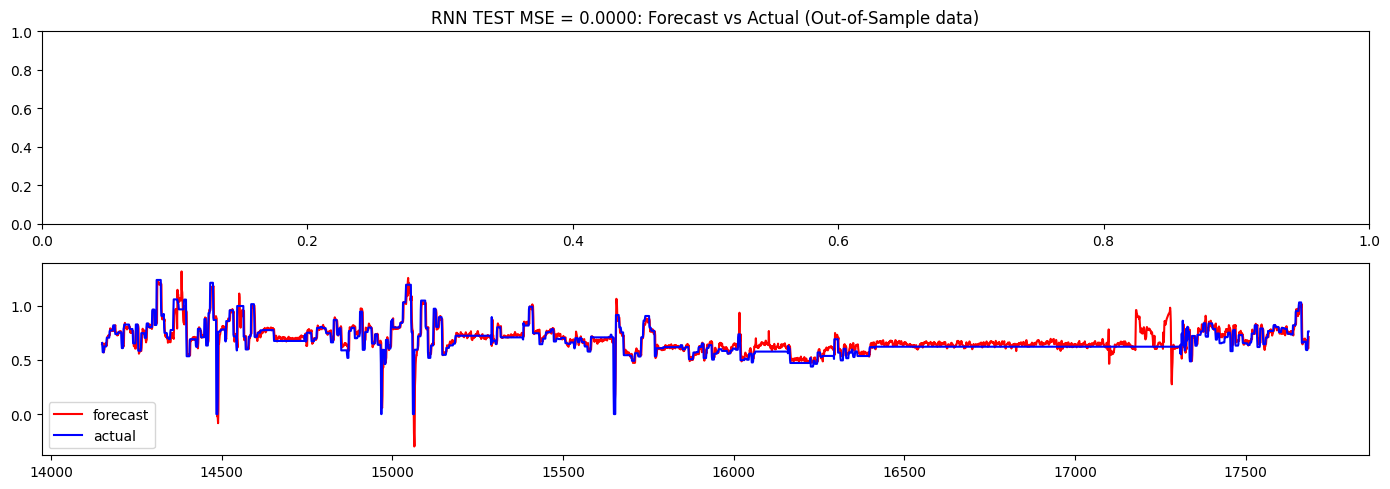

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


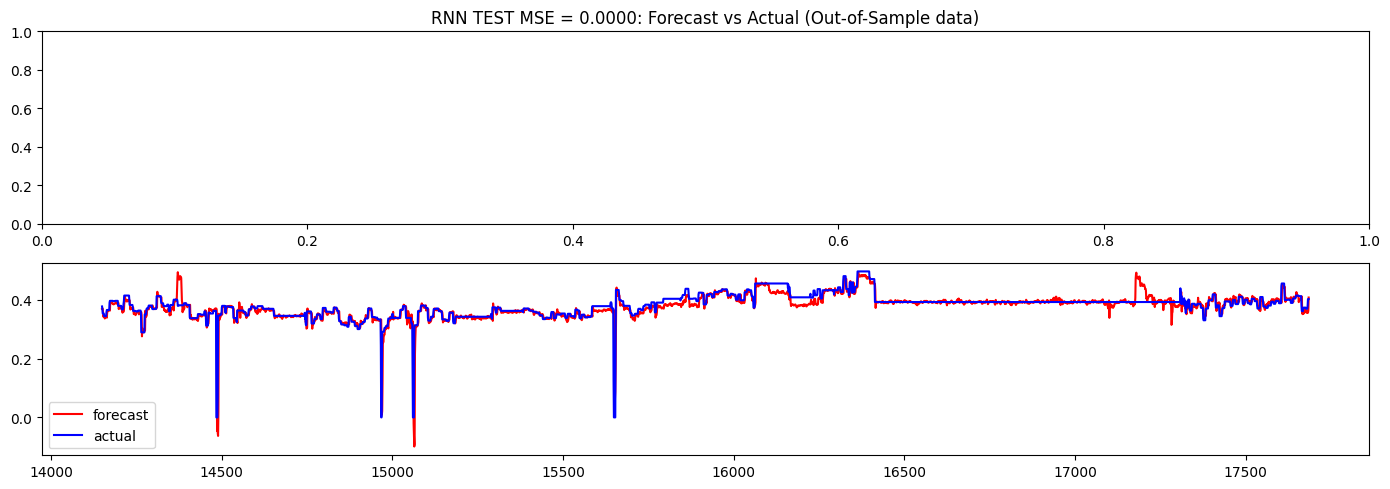

ricardo check this
torch.Size([3537, 19])
torch.Size([3537, 19])
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(3537, 19)
(1, 19)
(1, 19)
(3537, 19)
(3537, 19)


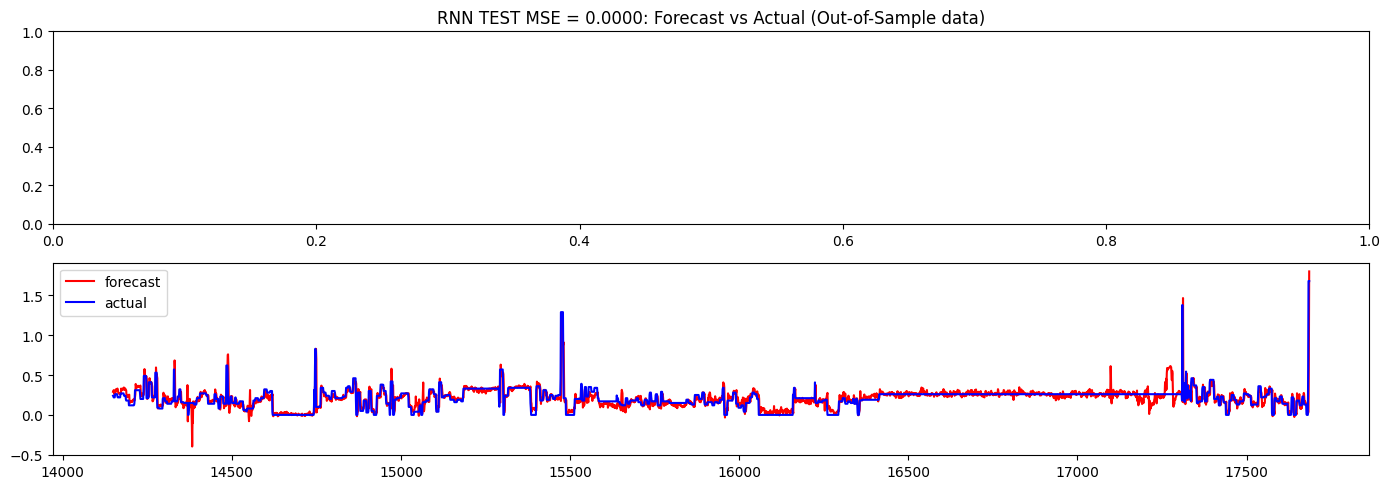

In [132]:

for i in range(19):

    x_index = i

    l1, l2 = View_all_predicted_Xs(x_index, model, model_type='RNN', **params_si )            
